In [21]:
from pathlib import Path
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Optional: progress bar
try:
    from tqdm.auto import tqdm
except ImportError:
    tqdm = None
    print("tqdm not installed, continuing without progress bars.")

# Base paths (relative to /notebooks)
PROJECT_ROOT = Path("..").resolve()
DATA_RAW = PROJECT_ROOT / "data" / "raw"

TRACKS_FEATURES_PATH      = DATA_RAW / "tracks_features.csv"
SPOTIFY_DATA_PATH         = DATA_RAW / "spotify_data.csv"
SPOTIFY_2023_PATH         = DATA_RAW / "spotify_features_data_2023.csv"
TRACKS_PATH               = DATA_RAW / "tracks.csv"
PATH_278K                 = DATA_RAW / "278k_labelled_uri.csv"
DATA_PATH                 = DATA_RAW / "data.csv"
RAW_SONGS_PATH            = DATA_RAW / "raw songs dataset.csv"
APRIL_2019_PATH           = DATA_RAW / "SpotifyAudioFeaturesApril2019.csv"
MUSIC_INFO_PATH           = DATA_RAW / "Music Info.csv"
MUSIC_PATH                = DATA_RAW / "Music.csv"
SONGS_AUDIO_FEAT_PATH     = DATA_RAW / "songs_with_audio_feature.csv"
DATASET_2MIL_PATH         = DATA_RAW / "2mil_dataset.json"
MPD_DIR                   = DATA_RAW / "mpd"

(
    TRACKS_FEATURES_PATH,
    SPOTIFY_DATA_PATH,
    SPOTIFY_2023_PATH,
    TRACKS_PATH,
    PATH_278K,
    DATA_PATH,
    RAW_SONGS_PATH,
    APRIL_2019_PATH,
    MUSIC_INFO_PATH,
    MUSIC_PATH,
    SONGS_AUDIO_FEAT_PATH,
    DATASET_2MIL_PATH,
    MPD_DIR,
)


(WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/tracks_features.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/spotify_data.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/spotify_features_data_2023.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/tracks.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/278k_labelled_uri.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/data.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/raw songs dataset.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/SpotifyAudioFeaturesApril2019.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/Music Info.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/Music.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/songs_with_audio_feature.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/2mil_dataset.json'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/ra

In [22]:
tracks_features_df = pd.read_csv(TRACKS_FEATURES_PATH)
spotify_data_df    = pd.read_csv(SPOTIFY_DATA_PATH)
spotify_2023_df    = pd.read_csv(SPOTIFY_2023_PATH)
tracks_df          = pd.read_csv(TRACKS_PATH)
k278_df            = pd.read_csv(PATH_278K)
data_df            = pd.read_csv(DATA_PATH)
raw_songs_df       = pd.read_csv(RAW_SONGS_PATH)
april_2019_df      = pd.read_csv(APRIL_2019_PATH)
music_info_df      = pd.read_csv(MUSIC_INFO_PATH)
music_df           = pd.read_csv(MUSIC_PATH)
songs_audio_df     = pd.read_csv(SONGS_AUDIO_FEAT_PATH)

# 2M JSON – load as a list of dicts then to DataFrame
with open(DATASET_2MIL_PATH, "r", encoding="utf-8") as f:
    data_2mil = json.load(f)
dataset_2mil_df = pd.DataFrame(data_2mil)

print("tracks_features.csv shape:                ", tracks_features_df.shape)
print("spotify_data.csv shape:                   ", spotify_data_df.shape)
print("spotify_features_data_2023.csv shape:     ", spotify_2023_df.shape)
print("tracks.csv shape:                         ", tracks_df.shape)
print("278k_labelled_uri.csv shape:              ", k278_df.shape)
print("data.csv shape:                           ", data_df.shape)
print("raw songs dataset.csv shape:              ", raw_songs_df.shape)
print("SpotifyAudioFeaturesApril2019.csv shape:  ", april_2019_df.shape)
print("Music Info.csv shape:                     ", music_info_df.shape)
print("Music.csv shape:                          ", music_df.shape)
print("songs_with_audio_feature.csv shape:       ", songs_audio_df.shape)
print("2mil_dataset.json (rows) shape:           ", dataset_2mil_df.shape)

display(tracks_features_df.head(2))
display(spotify_data_df.head(2))
display(spotify_2023_df.head(2))
display(tracks_df.head(2))
display(k278_df.head(2))
display(data_df.head(2))
display(raw_songs_df.head(2))
display(april_2019_df.head(2))
display(music_info_df.head(2))
display(music_df.head(2))
display(songs_audio_df.head(2))
display(dataset_2mil_df.head(2))


tracks_features.csv shape:                 (1204025, 24)
spotify_data.csv shape:                    (1159764, 20)
spotify_features_data_2023.csv shape:      (438112, 18)
tracks.csv shape:                          (586672, 20)
278k_labelled_uri.csv shape:               (277938, 15)
data.csv shape:                            (170653, 19)
raw songs dataset.csv shape:               (67499, 32)
SpotifyAudioFeaturesApril2019.csv shape:   (130663, 17)
Music Info.csv shape:                      (50683, 21)
Music.csv shape:                           (65795, 20)
songs_with_audio_feature.csv shape:        (35200, 21)
2mil_dataset.json (rows) shape:            (2305616, 14)


id             name                      album  \
0  7lmeHLHBe4nmXzuXc0HDjk          Testify  The Battle Of Los Angeles   
1  1wsRitfRRtWyEapl0q22o8  Guerrilla Radio  The Battle Of Los Angeles   

                 album_id                       artists  \
0  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
1  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   

                   artist_ids  track_number  disc_number  explicit  \
0  ['2d0hyoQ5ynDBnkvAbJKORj']             1            1     False   
1  ['2d0hyoQ5ynDBnkvAbJKORj']             2            1      True   

   danceability  ...  speechiness  acousticness  instrumentalness  liveness  \
0         0.470  ...       0.0727        0.0261          0.000011     0.356   
1         0.599  ...       0.1880        0.0129          0.000071     0.155   

   valence    tempo  duration_ms  time_signature  year  release_date  
0    0.503  117.906       210133             4.0  1999    1999-11-02  
1    0.489  103.680       206200             4.0  1999    1999-11-02  

[2 rows x 24 columns]

Unnamed: 0 artist_name        track_name                track_id  \
0           0  Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6   
1           1  Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218   

   popularity  year     genre  danceability  energy  key  loudness  mode  \
0          68  2012  acoustic         0.483   0.303    4   -10.058     1   
1          50  2012  acoustic         0.572   0.454    3   -10.286     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0429         0.694          0.000000    0.1150    0.139  133.406   
1       0.0258         0.477          0.000014    0.0974    0.515  140.182   

   duration_ms  time_signature  
0       240166               3  
1       216387               4

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.460   0.125   11    -8.094     0       0.0371         0.891   
1         0.621   0.125   10   -19.686     0       0.0376         0.977   

   instrumentalness  liveness  valence    tempo            type  \
0             0.000     0.165    0.275   75.639  audio_features   
1             0.916     0.104    0.321  166.048  audio_features   

                       id                                   uri  \
0  18r5gmlp3vQykXCskNJI0e  spotify:track:18r5gmlp3vQykXCskNJI0e   
1  0zfslMAEFfuIjkgxa6tEPc  spotify:track:0zfslMAEFfuIjkgxa6tEPc   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/18r5gmlp3vQy...   
1  https://api.spotify.com/v1/tracks/0zfslMAEFfuI...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/18r5...        89969   
1  https://api.spotify.com/v1/audio-analysis/0zfs...       188793   

   time_signature  
0               5  
1               4

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645   0.445    0   -13.338     1        0.451   
1   1922-06-01         0.695   0.263    0   -22.136     1        0.957   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674             0.744     0.151    0.127  104.851               3  
1         0.797             0.000     0.148    0.655  102.009               1

Unnamed: 0.1  Unnamed: 0  duration (ms)  danceability  energy  loudness  \
0             0           0       195000.0         0.611   0.614    -8.815   
1             1           1       194641.0         0.638   0.781    -6.848   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0672        0.0169          0.000794     0.753     0.52  128.050   
1       0.0285        0.0118          0.009530     0.349     0.25  122.985   

      spec_rate  labels                                   uri  
0  3.446154e-07       2  spotify:track:3v6sBj3swihU8pXQQHhDZo  
1  1.464234e-07       1  spotify:track:7KCWmFdw0TzoJbKtqRRzJO

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz             0.878   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8             0.000   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   

   speechiness   tempo  
0       0.0366  80.954  
1       0.4150  60.936

Unnamed: 0.1  Unnamed: 0  pos    artist_name               track_uri  \
0             0           0    0  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
1             1        7734   73  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   

                              artist_uri  \
0  spotify:artist:2wIVse2owClT7go1WT98tk   
1  spotify:artist:2wIVse2owClT7go1WT98tk   

                                   track_name  \
0  Lose Control (feat. Ciara & Fat Man Scoop)   
1  Lose Control (feat. Ciara & Fat Man Scoop)   

                              album_uri  duration_ms_x    album_name  ...  \
0  spotify:album:6vV5UrXcfyQD1wu4Qo2I9K         226863  The Cookbook  ...   
1  spotify:album:6vV5UrXcfyQD1wu4Qo2I9K         226863  The Cookbook  ...   

             type                      id  \
0  audio_features  0UaMYEvWZi0ZqiDOoHU3YI   
1  audio_features  0UaMYEvWZi0ZqiDOoHU3YI   

                                    uri  \
0  spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   
1  spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...   
1  https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...   

                                        analysis_url  duration_ms_y  \
0  https://api.spotify.com/v1/audio-analysis/0UaM...         226864   
1  https://api.spotify.com/v1/audio-analysis/0UaM...         226864   

   time_signature  artist_pop  \
0               4          74   
1               4          74   

                                              genres  track_pop  
0  dance_pop hip_hop hip_pop pop pop_rap r&b rap ...         69  
1  dance_pop hip_hop hip_pop pop pop_rap r&b rap ...         69  

[2 rows x 32 columns]

artist_name                track_id  \
0          YG  2RM4jf1Xa9zPgMGRDiht8O   
1          YG  1tHDG53xJNGsItRA3vfVgs   

                                       track_name  acousticness  danceability  \
0  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj       0.00582         0.743   
1                    BAND DRUM (feat. A$AP Rocky)       0.02440         0.846   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       238373   0.339               0.0    1    0.0812    -7.678     1   
1       214800   0.557               0.0    8    0.2860    -7.259     1   

   speechiness    tempo  time_signature  valence  popularity  
0        0.409  203.927               4    0.118          15  
1        0.457  159.009               4    0.371           0

track_id            name       artist  \
0  TRIOREW128F424EAF0  Mr. Brightside  The Killers   
1  TRRIVDJ128F429B0E8      Wonderwall        Oasis   

                                 spotify_preview_url              spotify_id  \
0  https://p.scdn.co/mp3-preview/4d26180e6961fd46...  09ZQ5TmUG8TSL56n0knqrj   
1  https://p.scdn.co/mp3-preview/d012e536916c927b...  06UfBBDISthj1ZJAtX4xjj   

                                                tags genre  year  duration_ms  \
0  rock, alternative, indie, alternative_rock, in...   NaN  2004       222200   
1  rock, alternative, indie, pop, alternative_roc...   NaN  2006       258613   

   danceability  ...  key  loudness  mode  speechiness  acousticness  \
0         0.355  ...    1    -4.360     1       0.0746      0.001190   
1         0.409  ...    2    -4.373     1       0.0336      0.000807   

   instrumentalness  liveness  valence    tempo  time_signature  
0               0.0    0.0971    0.240  148.114               4  
1               0.0    0.2070    0.651  174.426               4  

[2 rows x 21 columns]

name      artist              spotify_id  \
0  Mood (feat. iann dior)    24kGoldn  3tjFYV6RSFtuktYl3ZtYcq   
1         Blinding Lights  The Weeknd  0VjIjW4GlUZAMYd2vXMi3b   

                                             preview  \
0  https://p.scdn.co/mp3-preview/45cb08fdb67744ab...   
1                                                NaN   

                                                 img  danceability  energy  \
0  https://i.scdn.co/image/ab67616d0000b273ff8c98...         0.700   0.722   
1  https://i.scdn.co/image/ab67616d0000b2738863bc...         0.514   0.730   

   loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
0    -3.558       0.0369       0.22100          0.000000    0.2720    0.756   
1    -5.934       0.0598       0.00146          0.000095    0.0897    0.334   

   acousticness_artist  danceability_artist  energy_artist  \
0             0.118269             0.731588       0.681235   
1             0.271439             0.574808       0.607873   

   instrumentalness_artist  liveness_artist  speechiness_artist  \
0                 0.000002         0.160000            0.123765   
1                 0.010594         0.201728            0.086811   

   valence_artist  
0        0.566824  
1        0.305189

track_id                                         track_name  \
0  4BJqT0PrAfrxzMOxytFOIz  Piano Concerto No. 3 in D Minor, Op. 30: III. ...   
1  7xPhfUan2yNtyFG0cUWkt8                            Clancy Lowered the Boom   

                 album_id                                         artist_ids  \
0  6UKhQXIboybG7JPka28bZR  ['0Kekt6CKSo0m5mivKcoH51', '4qFQgEF1rg6a9WvJM0...   
1  4LePw1NceheT4selvgH0cE                         ['0y60qXGlDixlFJcjUU6pwY']   

                                        artist_names  valence  year  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...   0.0594  1921   
1                                     ['Dennis Day']   0.9630  1921   

   acousticness  danceability  duration_ms  ...  explicit  instrumentalness  \
0         0.982         0.279       831667  ...         0             0.878   
1         0.732         0.819       180533  ...         0             0.000   

   key  liveness  loudness  mode  popularity  release_date speechiness   tempo  
0   10     0.665   -20.096     1           4          1921      0.0366  80.954  
1    7     0.160   -12.441     1           5          1921      0.4150  60.936  

[2 rows x 21 columns]

track_uri  acousticness  danceability  duration_ms  energy  \
0  6LYE1PaRLikDNXR9mhzbOI         0.922         0.402        84027   0.262   
1  4K1qWaIbNiK12HhAskig13         0.319         0.922       129227   0.607   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.836    8    0.1070   -19.912     1       0.0411  100.522   
1             0.000    2    0.0778    -6.473     1       0.1730  124.894   

   time_signature  valence  
0               4    0.663  
1               4    0.964

In [23]:
def extract_track_id_from_uri(track_uri: str) -> str:
    """
    Convert 'spotify:track:0UaMYEvWZi0ZqiDOoHU3YI' → '0UaMYEvWZi0ZqiDOoHU3YI'.
    If it's already just an ID, or some other string, return as-is.
    """
    if not isinstance(track_uri, str):
        return None
    parts = track_uri.split(":")
    # Typical Spotify URI: spotify:track:<id>
    if len(parts) >= 3 and parts[-2] == "track":
        return parts[-1]
    return track_uri


def get_id_set(df: pd.DataFrame, candidates: list[str], name: str) -> set[str]:
    """
    Given a dataframe and a list of possible ID column names, return a set of
    canonical Spotify track IDs (strings). If no column is found, returns empty set.
    """
    for col in candidates:
        if col in df.columns:
            series = df[col].dropna().astype(str)
            if "uri" in col.lower():
                ids = {extract_track_id_from_uri(x) for x in series}
            else:
                ids = set(series)
            print(f"[{name}] using ID column: '{col}'   → {len(ids):,} unique IDs")
            return ids
    print(f"[{name}] WARNING: no ID column found among {candidates}. Returning empty set.")
    return set()


In [24]:
ids_tracks_features = get_id_set(
    tracks_features_df,
    ["id", "track_id", "spotify_id", "uri", "track_uri"],
    "tracks_features.csv",
)

ids_spotify_data = get_id_set(
    spotify_data_df,
    ["track_id", "id", "spotify_id", "uri", "track_uri"],
    "spotify_data.csv",
)

ids_spotify_2023 = get_id_set(
    spotify_2023_df,
    ["id", "track_id", "spotify_id", "uri", "track_uri"],
    "spotify_features_data_2023.csv",
)

ids_tracks = get_id_set(
    tracks_df,
    ["id", "track_id", "spotify_id", "uri", "track_uri"],
    "tracks.csv",
)

ids_278k = get_id_set(
    k278_df,
    ["track_id", "id", "spotify_id", "uri", "track_uri"],
    "278k_labelled_uri.csv",
)

ids_data = get_id_set(
    data_df,
    ["id", "track_id", "spotify_id", "uri", "track_uri"],
    "data.csv",
)

ids_raw_songs = get_id_set(
    raw_songs_df,
    ["id", "track_id", "spotify_id", "uri", "track_uri"],
    "raw songs dataset.csv",
)

ids_april_2019 = get_id_set(
    april_2019_df,
    ["id", "track_id", "spotify_id", "uri", "track_uri"],
    "SpotifyAudioFeaturesApril2019.csv",
)

ids_music_info = get_id_set(
    music_info_df,
    ["spotify_id", "track_id", "id", "uri", "track_uri"],
    "Music Info.csv",
)

ids_music = get_id_set(
    music_df,
    ["spotify_id", "track_id", "id", "uri", "track_uri"],
    "Music.csv",
)

ids_songs_audio = get_id_set(
    songs_audio_df,
    ["track_id", "id", "spotify_id", "uri", "track_uri"],
    "songs_with_audio_feature.csv",
)

ids_2mil = get_id_set(
    dataset_2mil_df,
    ["track_uri", "id", "track_id", "spotify_id", "uri"],
    "2mil_dataset.json",
)

# Union of all feature IDs
ids_features_union = (
    ids_tracks_features
    | ids_spotify_data
    | ids_spotify_2023
    | ids_tracks
    | ids_278k
    | ids_data
    | ids_raw_songs
    | ids_april_2019
    | ids_music_info
    | ids_music
    | ids_songs_audio
    | ids_2mil
)

print("\nSummary of individual feature ID counts:")
print(f"  tracks_features.csv:                    {len(ids_tracks_features):,}")
print(f"  spotify_data.csv:                       {len(ids_spotify_data):,}")
print(f"  spotify_features_data_2023.csv:         {len(ids_spotify_2023):,}")
print(f"  tracks.csv:                             {len(ids_tracks):,}")
print(f"  278k_labelled_uri.csv:                  {len(ids_278k):,}")
print(f"  data.csv:                               {len(ids_data):,}")
print(f"  raw songs dataset.csv:                  {len(ids_raw_songs):,}")
print(f"  SpotifyAudioFeaturesApril2019.csv:      {len(ids_april_2019):,}")
print(f"  Music Info.csv:                         {len(ids_music_info):,}")
print(f"  Music.csv:                              {len(ids_music):,}")
print(f"  songs_with_audio_feature.csv:           {len(ids_songs_audio):,}")
print(f"  2mil_dataset.json:                      {len(ids_2mil):,}")
print("-" * 80)
print(f"  UNION of all feature sources:           {len(ids_features_union):,}")


[tracks_features.csv] using ID column: 'id'   → 1,204,025 unique IDs
[spotify_data.csv] using ID column: 'track_id'   → 1,159,764 unique IDs
[spotify_features_data_2023.csv] using ID column: 'id'   → 438,112 unique IDs
[tracks.csv] using ID column: 'id'   → 586,672 unique IDs
[278k_labelled_uri.csv] using ID column: 'uri'   → 277,938 unique IDs
[data.csv] using ID column: 'id'   → 170,653 unique IDs
[raw songs dataset.csv] using ID column: 'id'   → 34,440 unique IDs
[SpotifyAudioFeaturesApril2019.csv] using ID column: 'track_id'   → 130,326 unique IDs
[Music Info.csv] using ID column: 'spotify_id'   → 50,674 unique IDs
[Music.csv] using ID column: 'spotify_id'   → 65,061 unique IDs
[songs_with_audio_feature.csv] using ID column: 'track_id'   → 35,200 unique IDs
il_dataset.json] using ID column: 'track_uri'   → 1,477,073 unique IDs

Summary of individual feature ID counts:
  tracks_features.csv:                    1,204,025
  spotify_data.csv:                       1,159,764
  spotify_f

In [25]:
mpd_files = sorted(MPD_DIR.glob("mpd.slice.*.json"))
print(f"Found {len(mpd_files)} MPD slice files")

mpd_track_ids = set()
playlist_count = 0
track_count = 0

iterator = mpd_files
if tqdm is not None:
    iterator = tqdm(mpd_files)

for path in iterator:
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
    playlists = data.get("playlists", [])
    playlist_count += len(playlists)
    
    for pl in playlists:
        tracks = pl.get("tracks", [])
        track_count += len(tracks)
        for t in tracks:
            uri = t.get("track_uri")
            tid = extract_track_id_from_uri(uri)
            if tid:
                mpd_track_ids.add(tid)

print(f"Total playlists in MPD slices:         {playlist_count:,}")
print(f"Total track entries (with duplicates): {track_count:,}")
print(f"Unique track IDs in MPD:               {len(mpd_track_ids):,}")


Found 20 MPD slice files


100%|██████████| 20/20 [00:06<00:00,  3.05it/s]

Total playlists in MPD slices:         20,000
Total track entries (with duplicates): 1,339,962
Unique track IDs in MPD:               261,689


In [26]:
n_mpd = len(mpd_track_ids)

def overlap_stats(name: str, feature_ids: set[str]):
    n_feat = len(feature_ids)
    inter = mpd_track_ids & feature_ids
    n_inter = len(inter)
    print(f"{name}")
    print(f"  Unique feature track IDs:           {n_feat:,}")
    print(f"  Overlap with MPD:                   {n_inter:,}")
    if n_mpd > 0:
        print(f"    - % of MPD covered by {name}:     {n_inter / n_mpd * 100:6.2f}%")
    if n_feat > 0:
        print(f"    - % of {name} that are in MPD:    {n_inter / n_feat * 100:6.2f}%")
    print()

overlap_stats("tracks_features.csv",                    ids_tracks_features)
overlap_stats("spotify_data.csv",                       ids_spotify_data)
overlap_stats("spotify_features_data_2023.csv",         ids_spotify_2023)
overlap_stats("tracks.csv",                             ids_tracks)
overlap_stats("278k_labelled_uri.csv",                  ids_278k)
overlap_stats("data.csv",                               ids_data)
overlap_stats("raw songs dataset.csv",                  ids_raw_songs)
overlap_stats("SpotifyAudioFeaturesApril2019.csv",      ids_april_2019)
overlap_stats("Music Info.csv",                         ids_music_info)
overlap_stats("Music.csv",                              ids_music)
overlap_stats("songs_with_audio_feature.csv",           ids_songs_audio)
overlap_stats("2mil_dataset.json",                      ids_2mil)
overlap_stats("UNION of all feature sources",           ids_features_union)


tracks_features.csv
  Unique feature track IDs:           1,204,025
  Overlap with MPD:                   21,550
    - % of MPD covered by tracks_features.csv:       8.23%
    - % of tracks_features.csv that are in MPD:      1.79%

spotify_data.csv
  Unique feature track IDs:           1,159,764
  Overlap with MPD:                   46,197
    - % of MPD covered by spotify_data.csv:      17.65%
    - % of spotify_data.csv that are in MPD:      3.98%

spotify_features_data_2023.csv
  Unique feature track IDs:           438,112
  Overlap with MPD:                   9,567
    - % of MPD covered by spotify_features_data_2023.csv:       3.66%
    - % of spotify_features_data_2023.csv that are in MPD:      2.18%

tracks.csv
  Unique feature track IDs:           586,672
  Overlap with MPD:                   34,555
    - % of MPD covered by tracks.csv:      13.20%
    - % of tracks.csv that are in MPD:      5.89%

278k_labelled_uri.csv
  Unique feature track IDs:           277,938
  Overlap wi

Unique track IDs in MPD:                    261,689
Unique track IDs in features UNION:         4,740,377
Overlap (tracks in both):                   210,576
  - % of MPD tracks covered by UNION:       80.47%
  - % of UNION tracks that appear in MPD:   4.44%


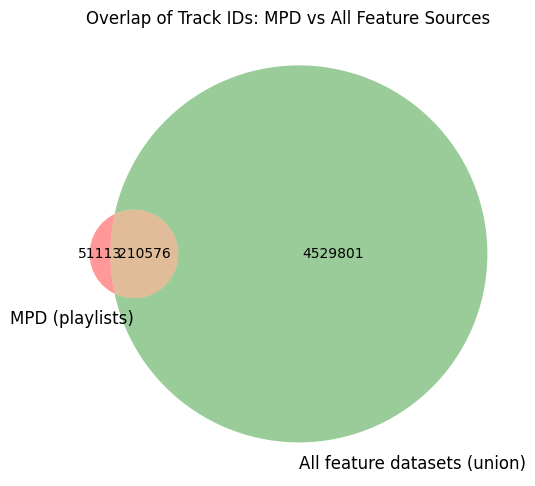

In [27]:
n_feat_union = len(ids_features_union)
intersection_union = mpd_track_ids & ids_features_union
n_inter_union = len(intersection_union)

print(f"Unique track IDs in MPD:                    {n_mpd:,}")
print(f"Unique track IDs in features UNION:         {n_feat_union:,}")
print(f"Overlap (tracks in both):                   {n_inter_union:,}")
print(f"  - % of MPD tracks covered by UNION:       {n_inter_union / n_mpd * 100:.2f}%")
print(f"  - % of UNION tracks that appear in MPD:   {n_inter_union / n_feat_union * 100:.2f}%")

plt.figure(figsize=(6, 6))
venn2(
    subsets=(
        n_mpd - n_inter_union,        # MPD only
        n_feat_union - n_inter_union, # Features only
        n_inter_union                 # Both
    ),
    set_labels=("MPD (playlists)", "All feature datasets (union)")
)
plt.title("Overlap of Track IDs: MPD vs All Feature Sources")
plt.show()


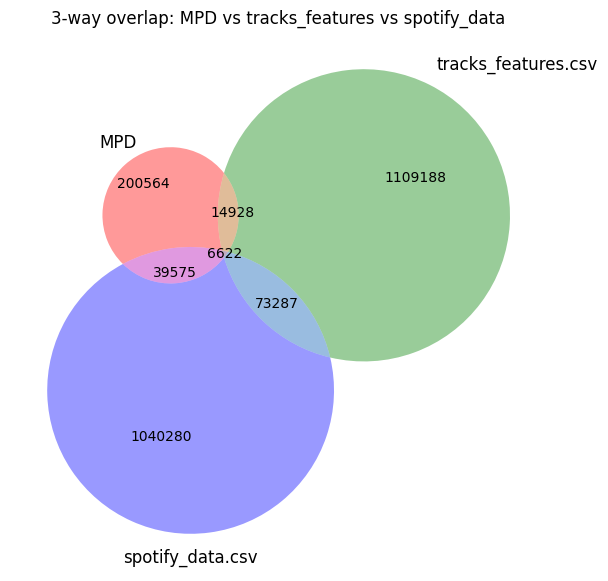

In [28]:
from matplotlib_venn import venn2, venn3

plt.figure(figsize=(7, 7))

venn3(
    subsets=(
        mpd_track_ids,          # Set A: MPD
        ids_tracks_features,    # Set B: tracks_features.csv
        ids_spotify_data        # Set C: spotify_data.csv
    ),
    set_labels=("MPD", "tracks_features.csv", "spotify_data.csv"),
)

plt.title("3-way overlap: MPD vs tracks_features vs spotify_data")
plt.show()


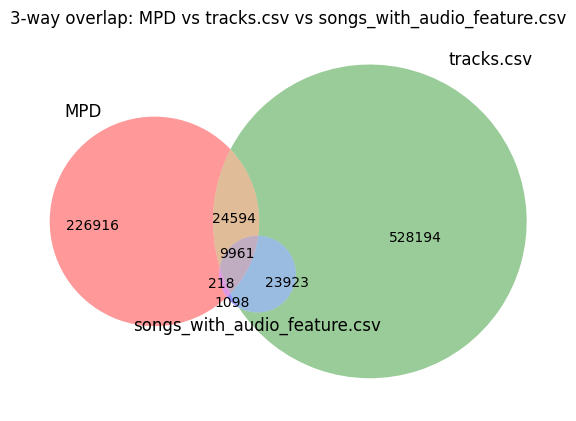

In [29]:
plt.figure(figsize=(7, 7))

venn3(
    subsets=(
        mpd_track_ids,      # MPD
        ids_tracks,         # tracks.csv
        ids_songs_audio     # songs_with_audio_feature.csv
    ),
    set_labels=("MPD", "tracks.csv", "songs_with_audio_feature.csv"),
)

plt.title("3-way overlap: MPD vs tracks.csv vs songs_with_audio_feature.csv")
plt.show()


In [30]:
# Create a CSV-only union (everything except the 2mil JSON)
ids_csv_union = (
    ids_tracks_features
    | ids_spotify_data
    | ids_spotify_2023
    | ids_tracks
    | ids_278k
    | ids_data
    | ids_raw_songs
    | ids_april_2019
    | ids_music_info
    | ids_music
    | ids_songs_audio
)

print("CSV union size:", len(ids_csv_union))


CSV union size: 3561100


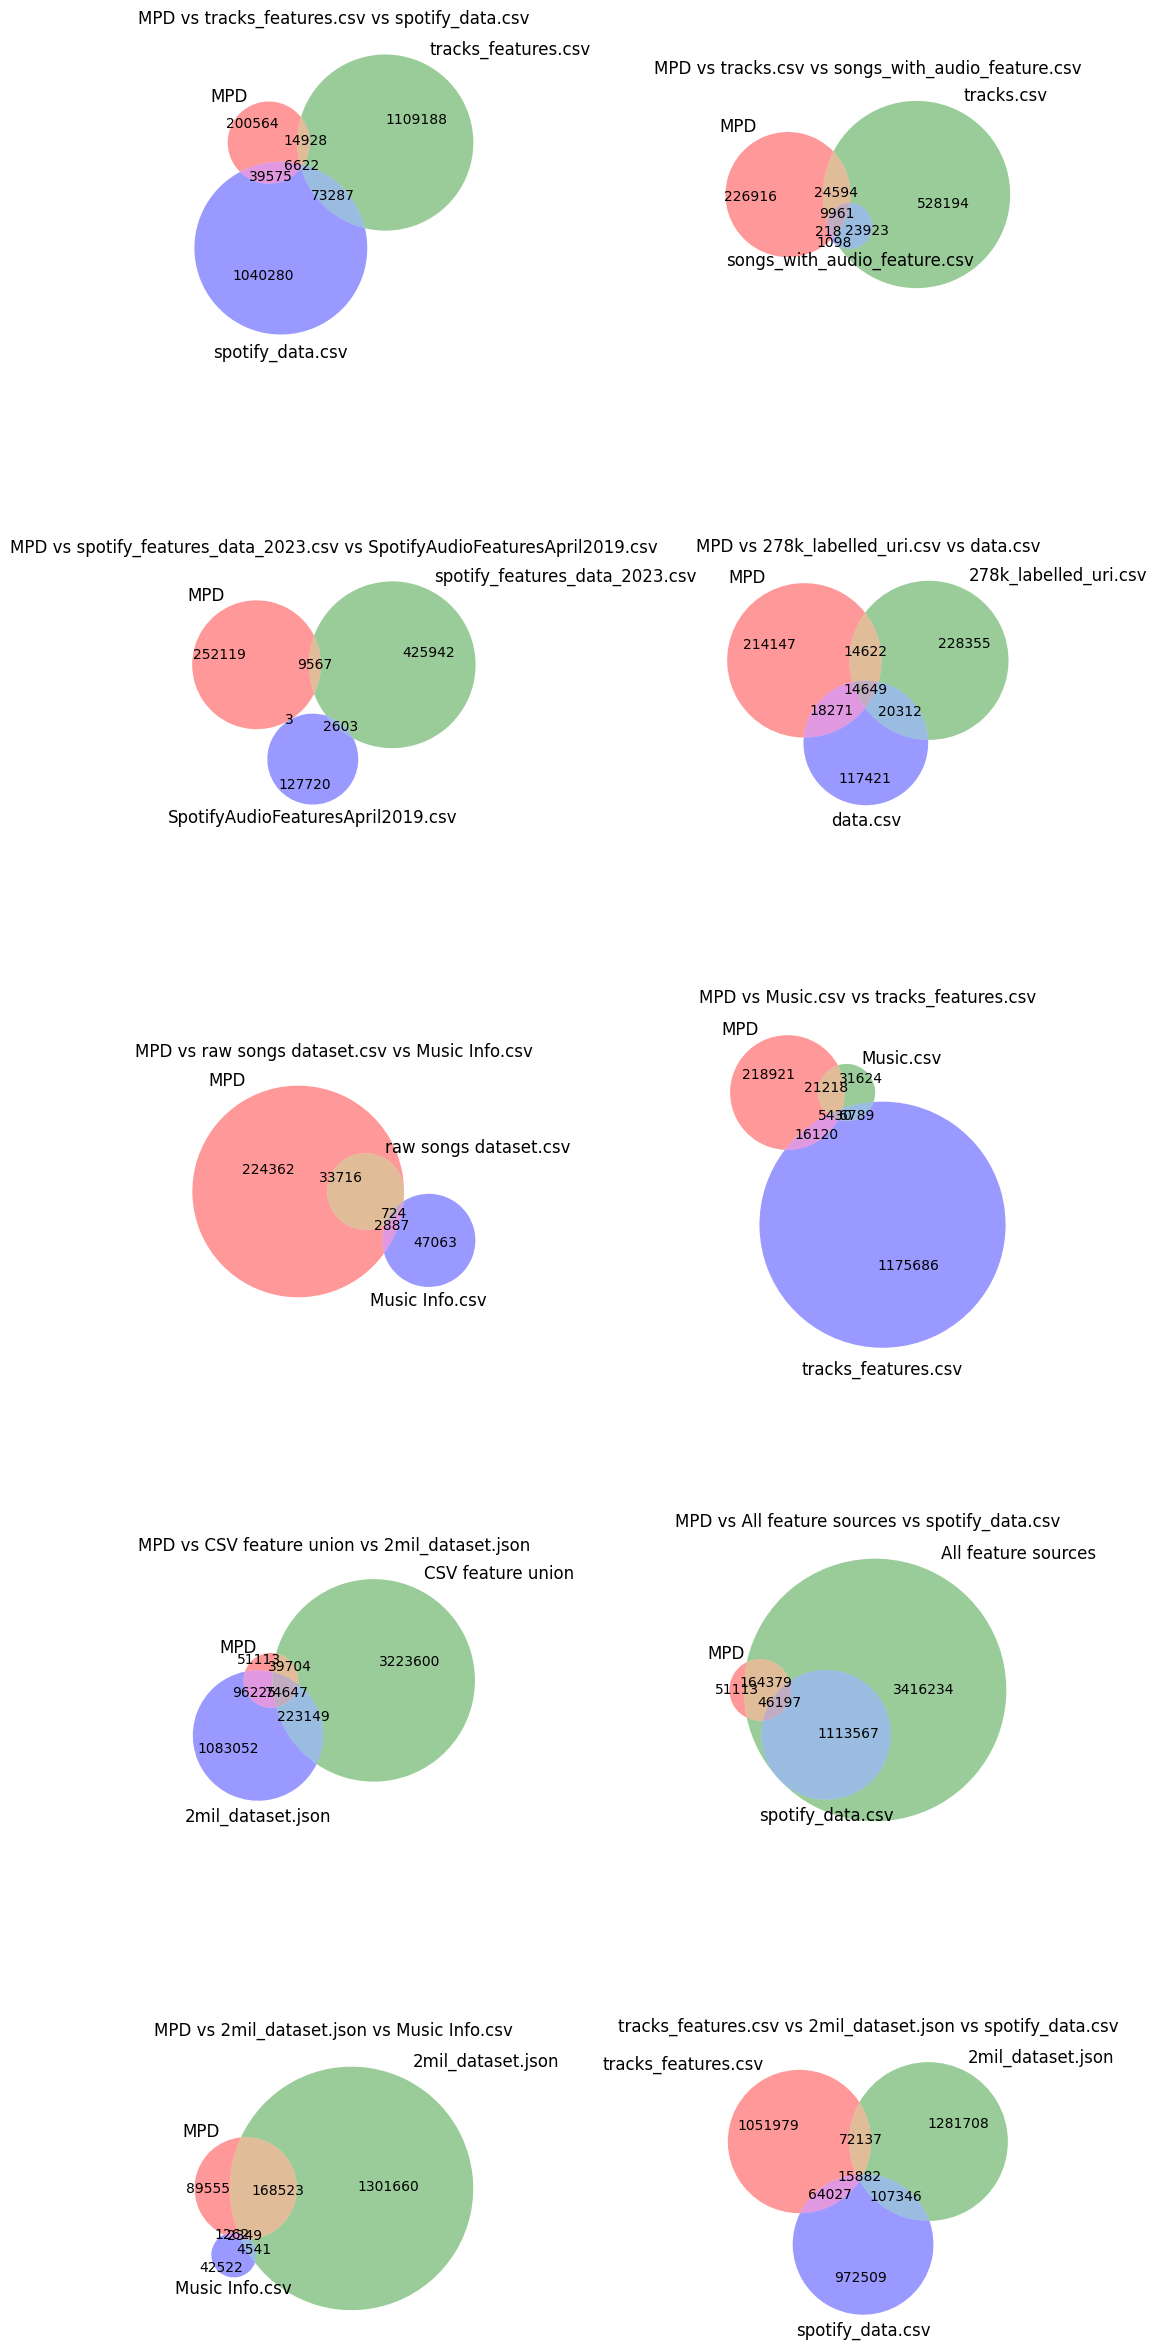

In [31]:
from matplotlib_venn import venn3

# (labels, varnames)
triples = [
    (("MPD", "tracks_features.csv", "spotify_data.csv"),
     ("mpd_track_ids", "ids_tracks_features", "ids_spotify_data")),

    (("MPD", "tracks.csv", "songs_with_audio_feature.csv"),
     ("mpd_track_ids", "ids_tracks", "ids_songs_audio")),

    (("MPD", "spotify_features_data_2023.csv", "SpotifyAudioFeaturesApril2019.csv"),
     ("mpd_track_ids", "ids_spotify_2023", "ids_april_2019")),

    (("MPD", "278k_labelled_uri.csv", "data.csv"),
     ("mpd_track_ids", "ids_278k", "ids_data")),

    (("MPD", "raw songs dataset.csv", "Music Info.csv"),
     ("mpd_track_ids", "ids_raw_songs", "ids_music_info")),

    (("MPD", "Music.csv", "tracks_features.csv"),
     ("mpd_track_ids", "ids_music", "ids_tracks_features")),

    (("MPD", "CSV feature union", "2mil_dataset.json"),
     ("mpd_track_ids", "ids_csv_union", "ids_2mil")),

    (("MPD", "All feature sources", "spotify_data.csv"),
     ("mpd_track_ids", "ids_features_union", "ids_spotify_data")),

    (("MPD", "2mil_dataset.json", "Music Info.csv"),
     ("mpd_track_ids", "ids_2mil", "ids_music_info")),

    (("tracks_features.csv", "2mil_dataset.json", "spotify_data.csv"),
     ("ids_tracks_features", "ids_2mil", "ids_spotify_data")),
]

# Compute grid size: 3 columns
n = len(triples)
cols = 2
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

# Flatten axes for easier indexing
axes = axes.flatten()

for i, ((labA, labB, labC), (varA, varB, varC)) in enumerate(triples):
    ax = axes[i]
    
    # Skip missing sets safely
    if varA not in globals() or varB not in globals() or varC not in globals():
        ax.text(0.5, 0.5, f"Missing: {varA}/{varB}/{varC}", ha='center')
        ax.axis("off")
        continue

    setA = globals()[varA]
    setB = globals()[varB]
    setC = globals()[varC]

    plt.sca(ax)
    venn3(
        subsets=(setA, setB, setC),
        set_labels=(labA, labB, labC)
    )
    ax.set_title(f"{labA} vs {labB} vs {labC}")

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


c:\Users\Kiera\Music_Recommender\.venv\Lib\site-packages\upsetplot\data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
c:\Users\Kiera\Music_Recommender\.venv\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].filln

<Figure size 1000x600 with 0 Axes>

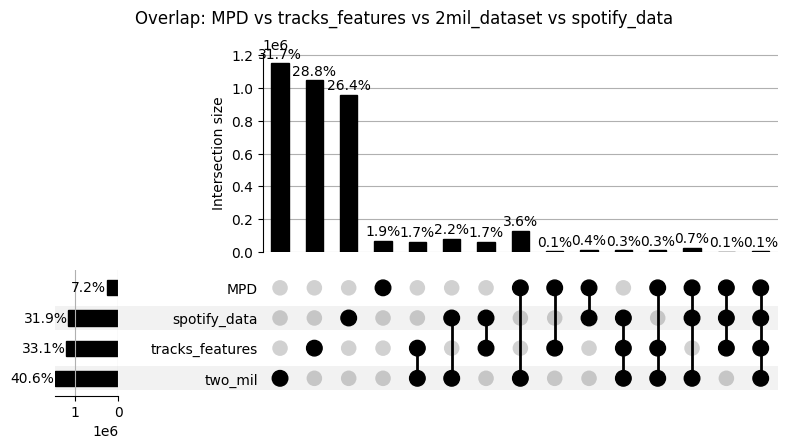

In [32]:
# If not installed, run in a cell:  !pip install upsetplot
from upsetplot import from_memberships, UpSet
import matplotlib.pyplot as plt

# 4 sets:
#   - MPD
#   - tracks_features.csv
#   - 2mil_dataset.json
#   - spotify_data.csv

set_dict = {
    "MPD": mpd_track_ids,
    "tracks_features": ids_tracks_features,
    "two_mil": ids_2mil,
    "spotify_data": ids_spotify_data,
}

# Build memberships for all track IDs that appear in any of these sets
all_ids_4 = set().union(*set_dict.values())

memberships = []
for tid in all_ids_4:
    membership = []
    for name, s in set_dict.items():
        if tid in s:
            membership.append(name)
    memberships.append(tuple(membership))

# Build UpSet data
data = from_memberships(memberships)

plt.figure(figsize=(10, 6))
UpSet(data, subset_size='count', show_percentages=True).plot()
plt.suptitle("Overlap: MPD vs tracks_features vs 2mil_dataset vs spotify_data")
plt.show()


In [33]:
# If you don't have upsetplot yet, run this once in a cell:
# !pip install upsetplot

from upsetplot import from_memberships, UpSet

# Define all sets you want in the UpSet, including MPD
set_dict = {
    "MPD": mpd_track_ids,
    "tracks_features": ids_tracks_features,
    "spotify_data": ids_spotify_data,
    "spotify_2023": ids_spotify_2023,
    "tracks": ids_tracks,
    "278k_labelled": ids_278k,
    "data_csv": ids_data,
    "raw_songs": ids_raw_songs,
    "april_2019": ids_april_2019,
    "music_info": ids_music_info,
    "music": ids_music,
    "songs_audio": ids_songs_audio,
    "two_mil": ids_2mil,
}

# Build the global universe of IDs across all sets
all_ids_all = set().union(*set_dict.values())
print(f"Total unique track IDs across all sets: {len(all_ids_all):,}")

# Build membership list for UpSet
memberships = []
for tid in all_ids_all:
    membership = tuple(name for name, s in set_dict.items() if tid in s)
    memberships.append(membership)

# Build UpSet data (a pandas Series with MultiIndex of set membership)
data_all = from_memberships(memberships)

print("Number of distinct subset combinations:", len(data_all))
data_all.head()


Total unique track IDs across all sets: 4,791,490


c:\Users\Kiera\Music_Recommender\.venv\Lib\site-packages\upsetplot\data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)


Number of distinct subset combinations: 4791490


278k_labelled  MPD    april_2019  data_csv  music  music_info  raw_songs  songs_audio  spotify_2023  spotify_data  tracks  tracks_features  two_mil
False          False  False       False     False  False       False      False        False         True          False   False            False      1
                                                                                                     False         False   True             False      1
                                                                                                                                            False      1
                                                                                                                           False            True       1
                                                                                                                           True             False      1
Name: ones, dtype: int64

Total IDs in UpSet universe: 4791490


c:\Users\Kiera\Music_Recommender\.venv\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
c:\Users\Kiera\Music_Recommender\.venv\Lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

<Figure size 1200x600 with 0 Axes>

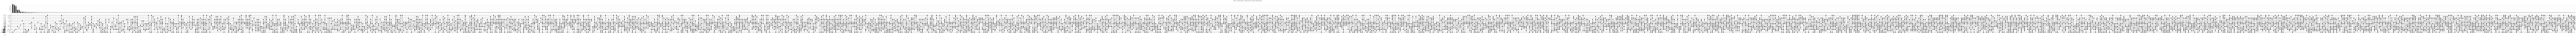

c:\Users\Kiera\Music_Recommender\.venv\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
c:\Users\Kiera\Music_Recommender\.venv\Lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

<Figure size 1000x600 with 0 Axes>

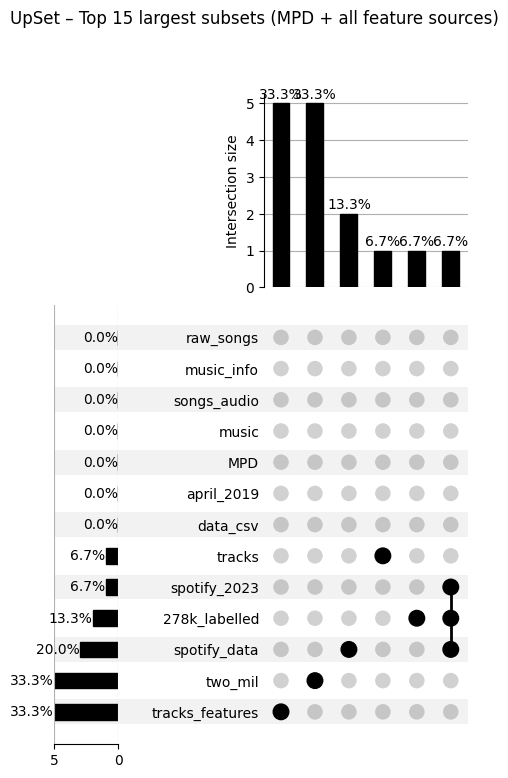

In [34]:
import matplotlib.pyplot as plt

# Sort subsets by descending size (count). Percentage is proportional to this.
data_sorted = data_all.sort_values(ascending=False)

# Total IDs for percentages
total_ids = data_sorted.sum()
print("Total IDs in UpSet universe:", total_ids)

# ==== 1) FULL UpSet: all subsets, sorted by size/percentage ====
plt.figure(figsize=(12, 6))
up_all = UpSet(
    data_sorted,
    subset_size='count',
    show_percentages=True,
    sort_by='cardinality',   # ensure largest subsets first
)
up_all.plot()
plt.suptitle("UpSet – All subsets (MPD + all feature sources), sorted by size/percentage")
plt.show()

# ==== 2) TOP 15 UpSet: only largest 15 subsets ====
data_top15 = data_sorted.head(15)

plt.figure(figsize=(10, 6))
up_top = UpSet(
    data_top15,
    subset_size='count',
    show_percentages=True,
    sort_by='cardinality',
)
up_top.plot()
plt.suptitle("UpSet – Top 15 largest subsets (MPD + all feature sources)")
plt.show()


Total pairwise Venn diagrams: 105
Page 1: plotting 16 diagrams


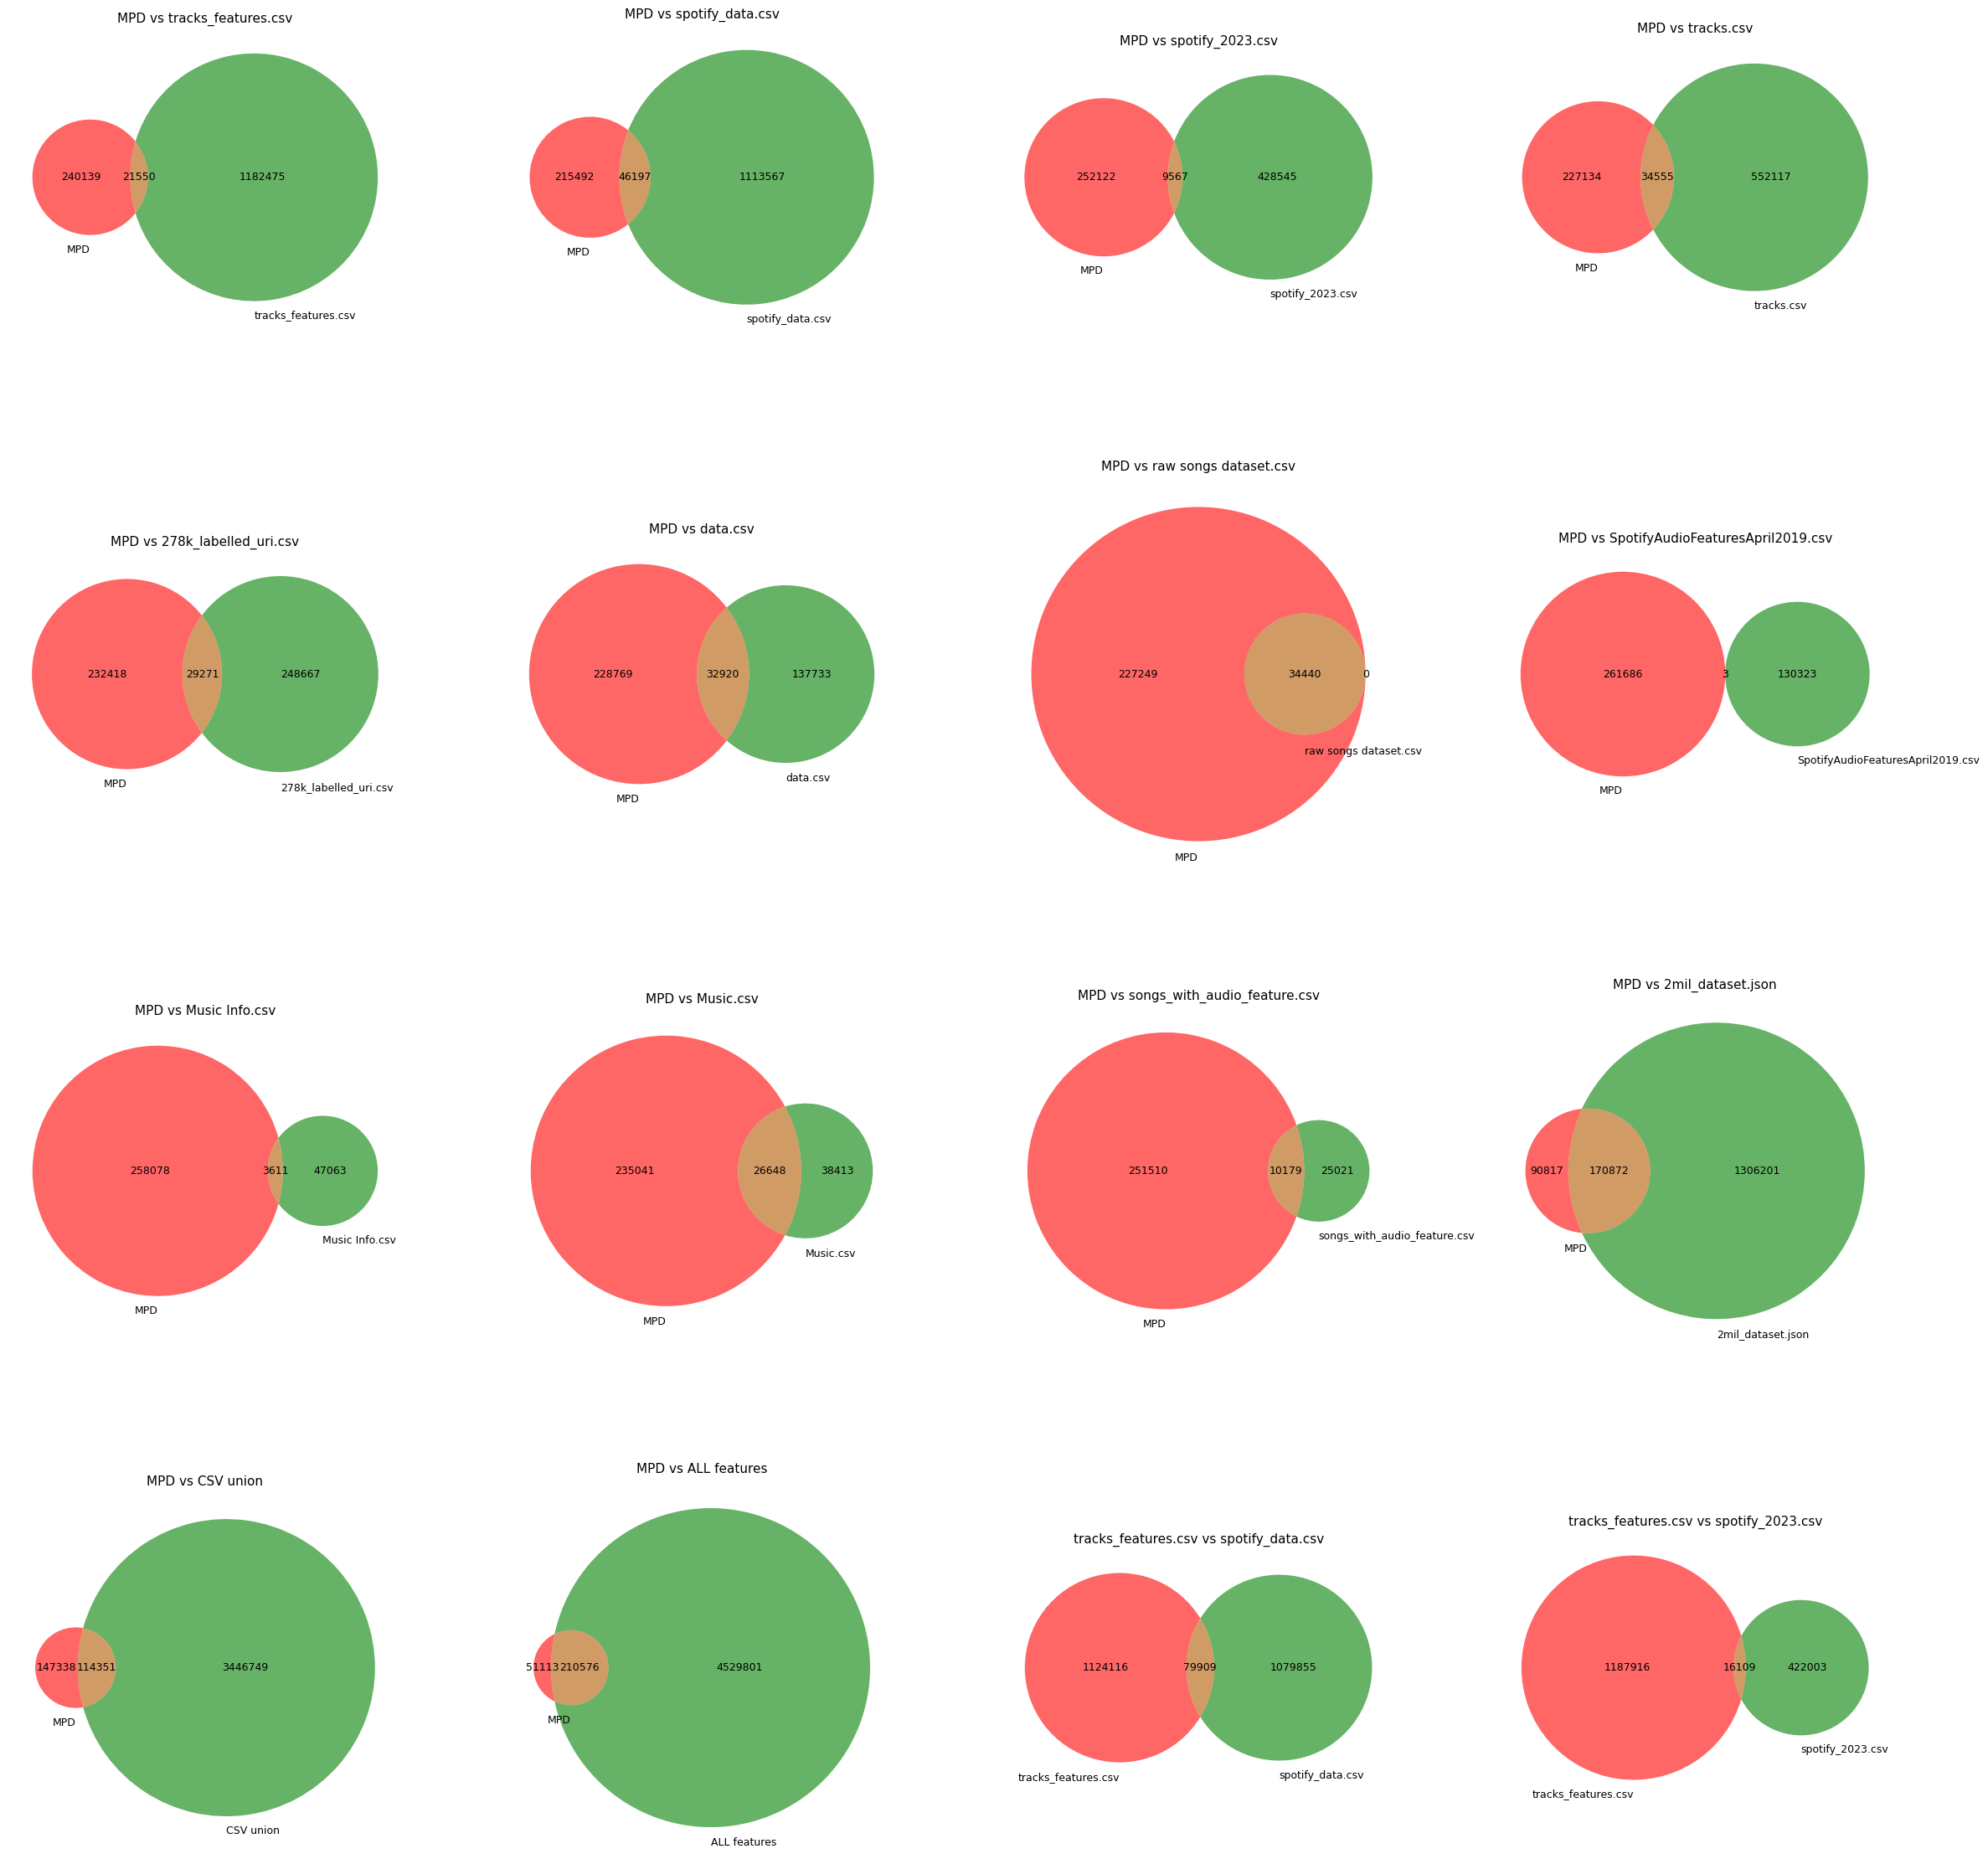

Page 2: plotting 16 diagrams


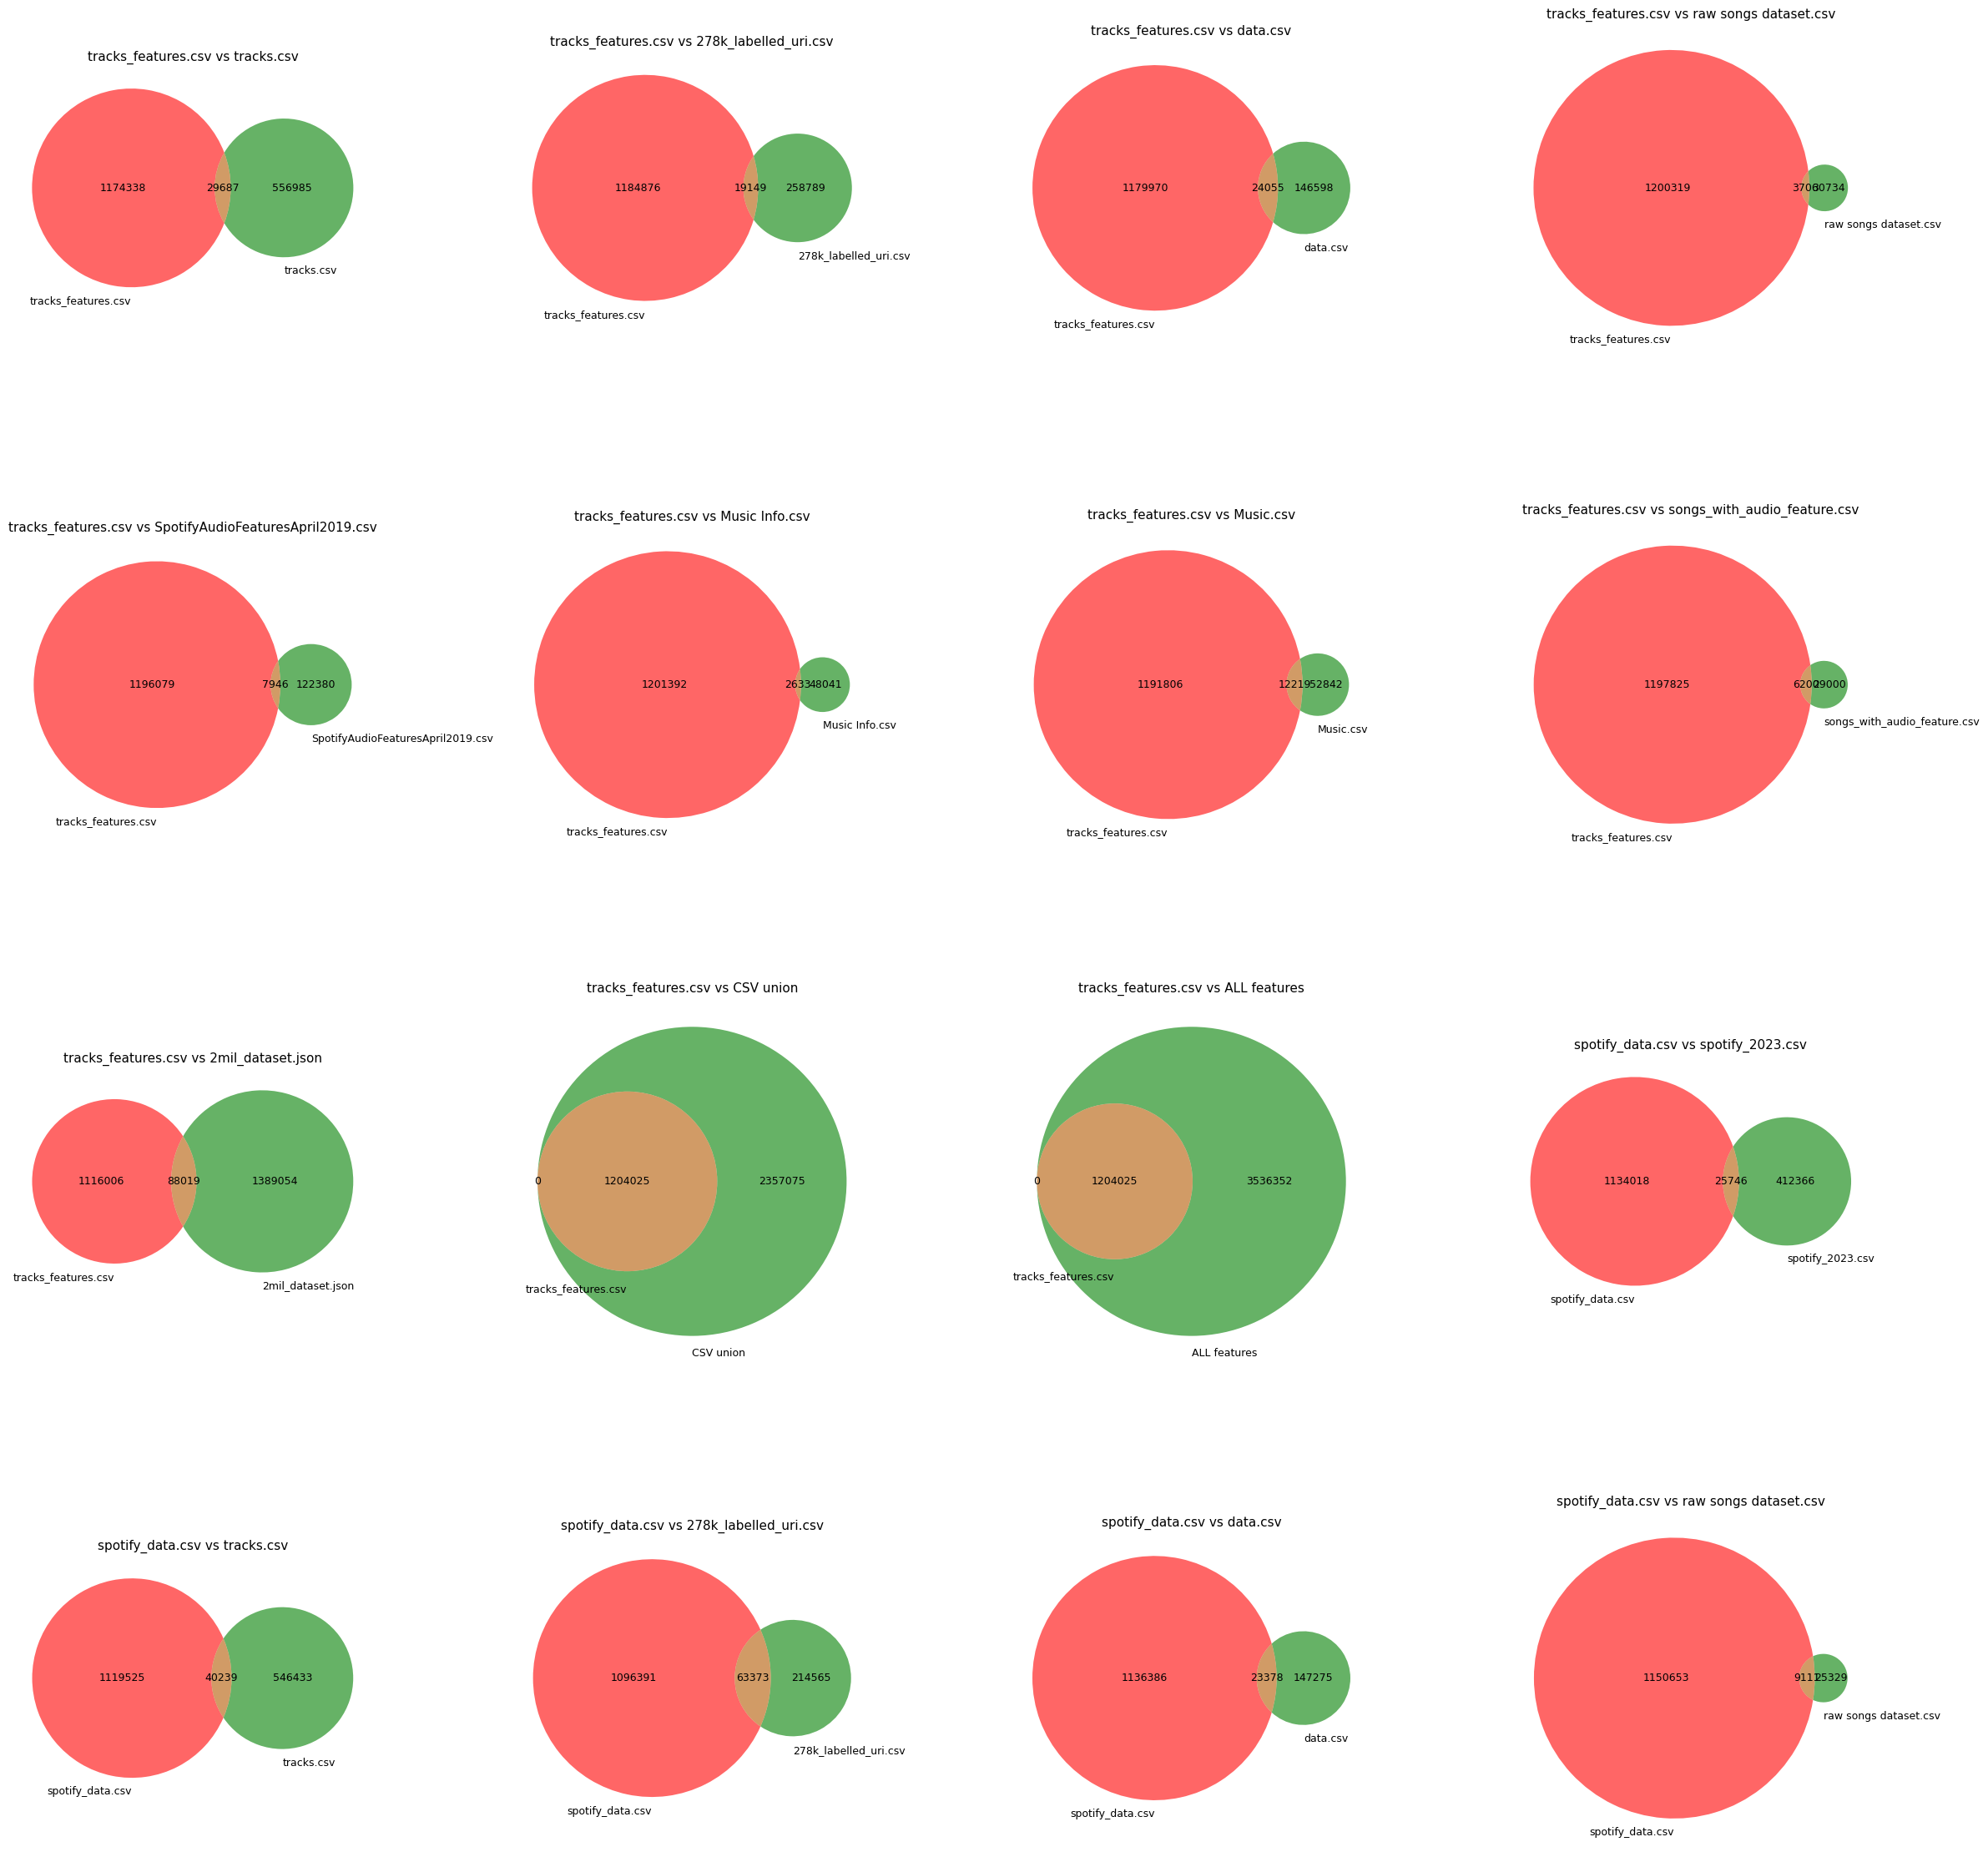

Page 3: plotting 16 diagrams


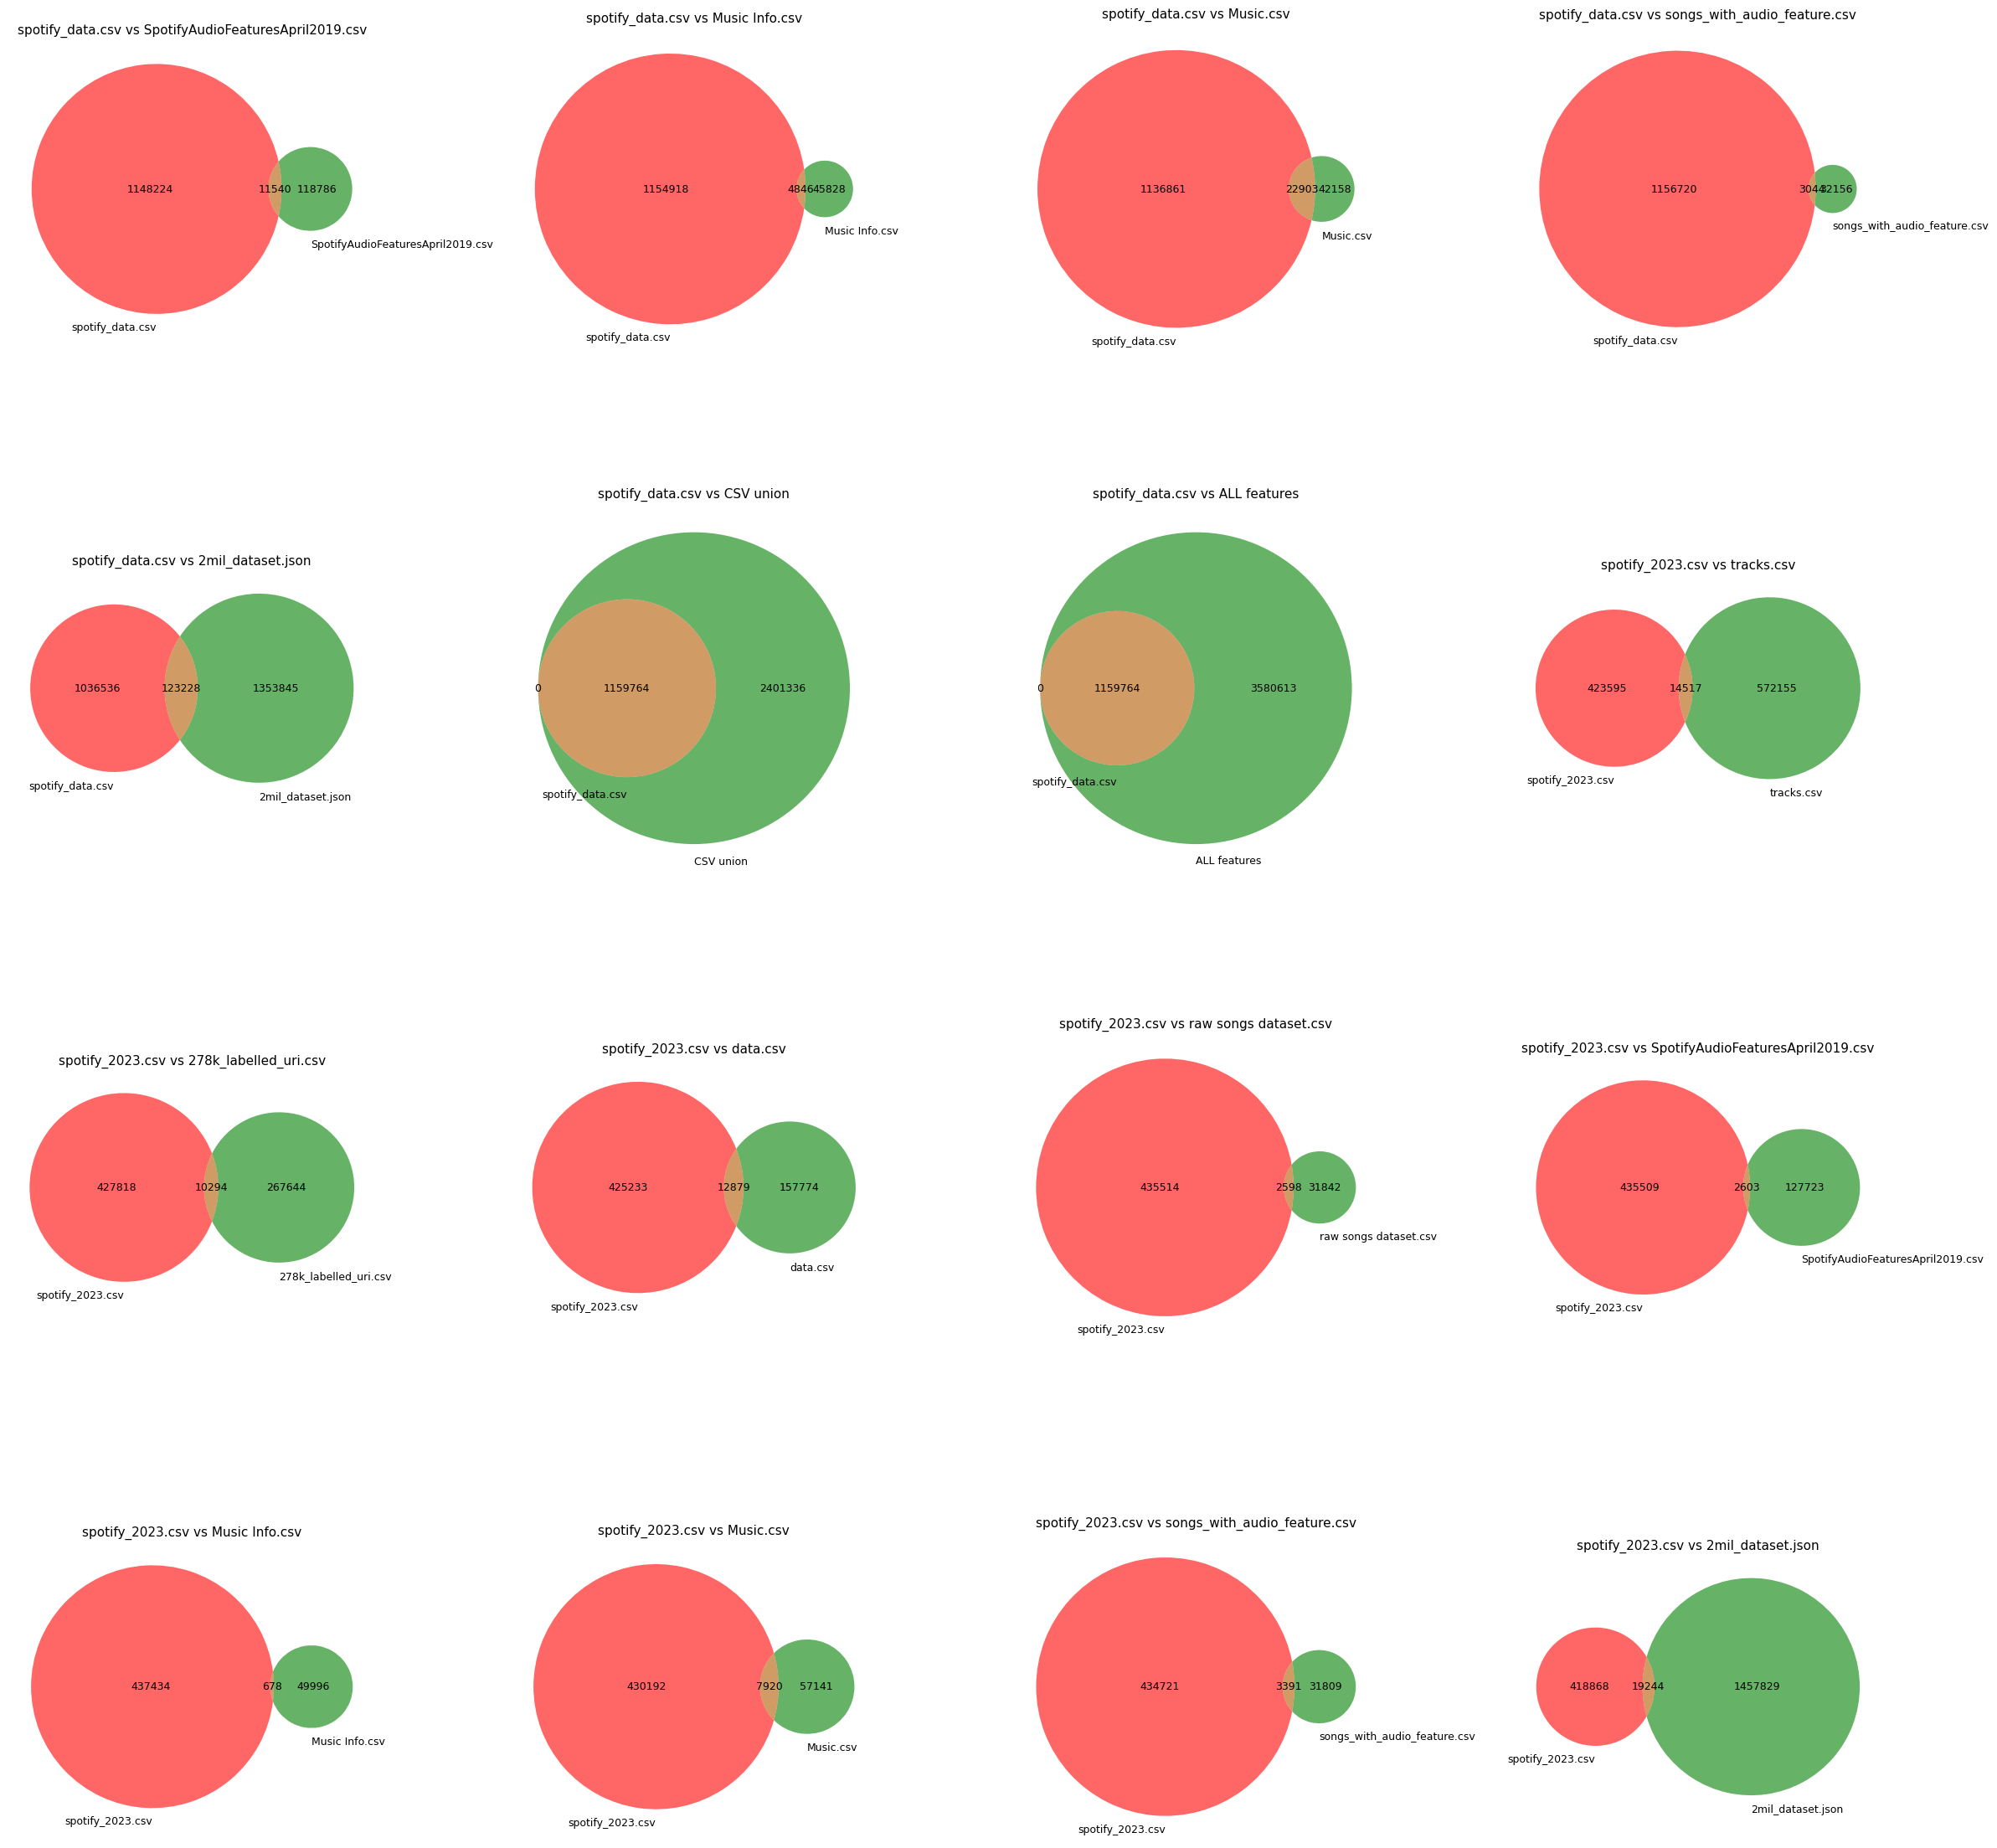

Page 4: plotting 16 diagrams


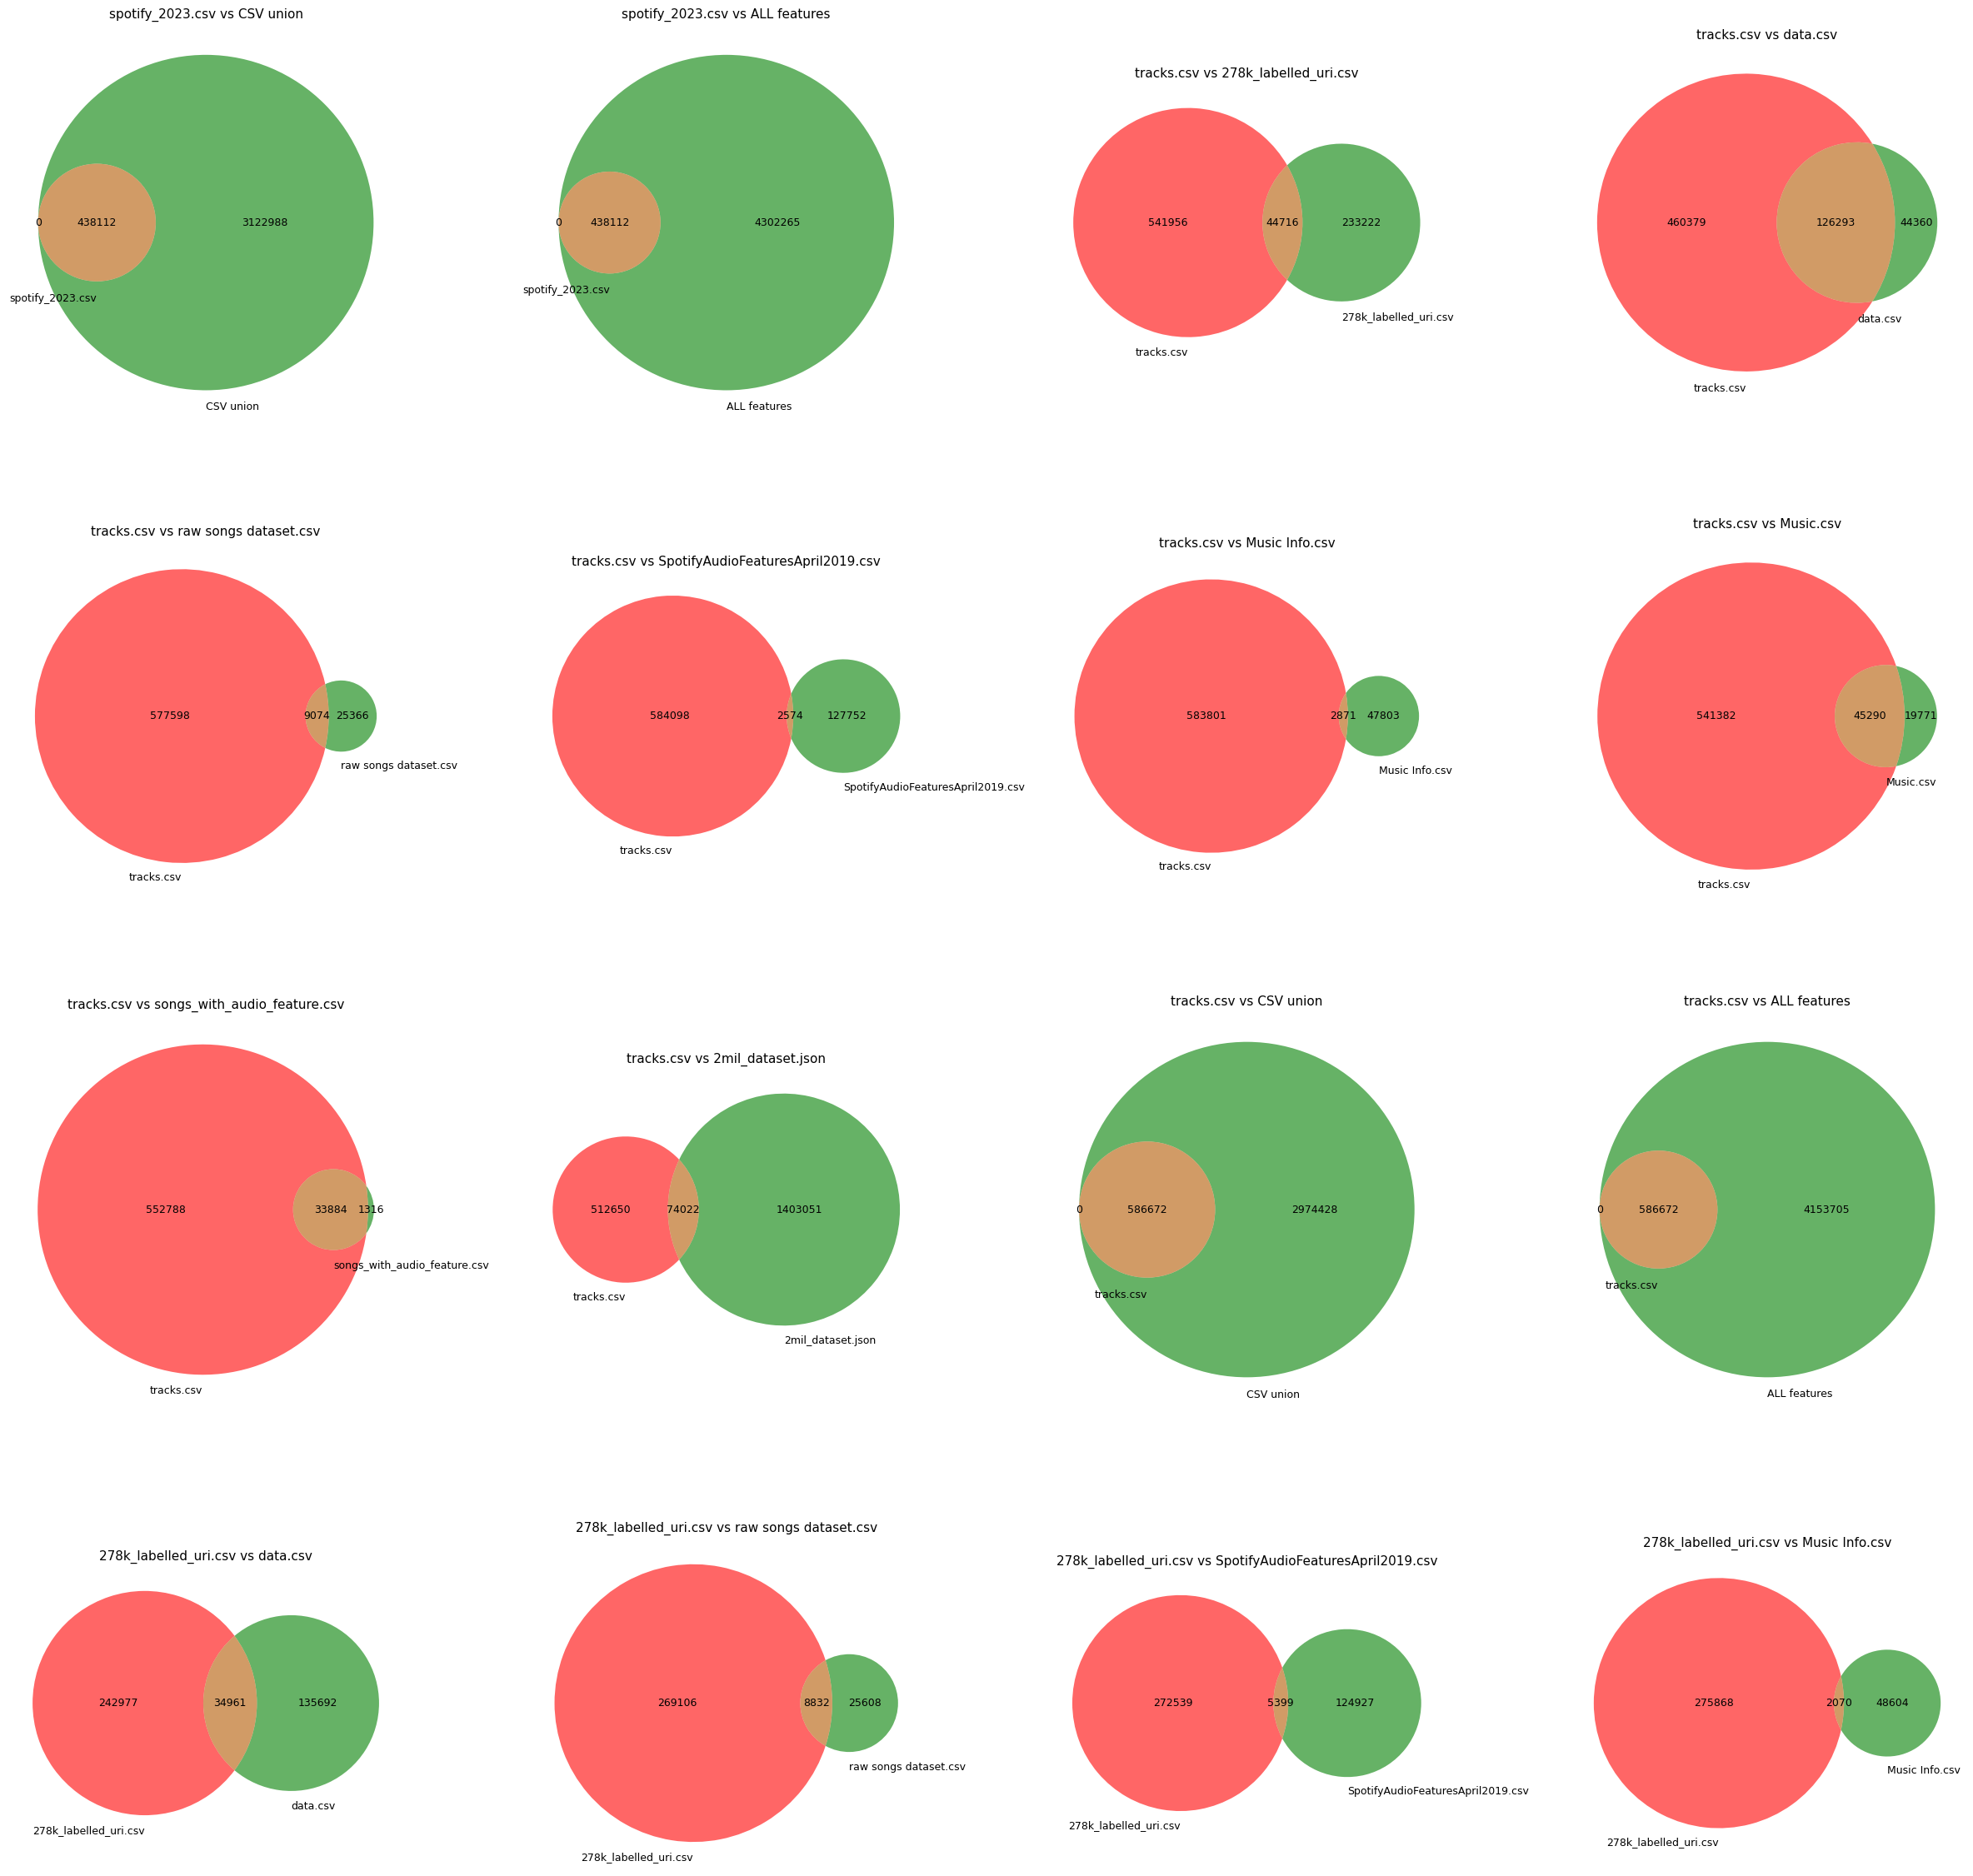

Page 5: plotting 16 diagrams


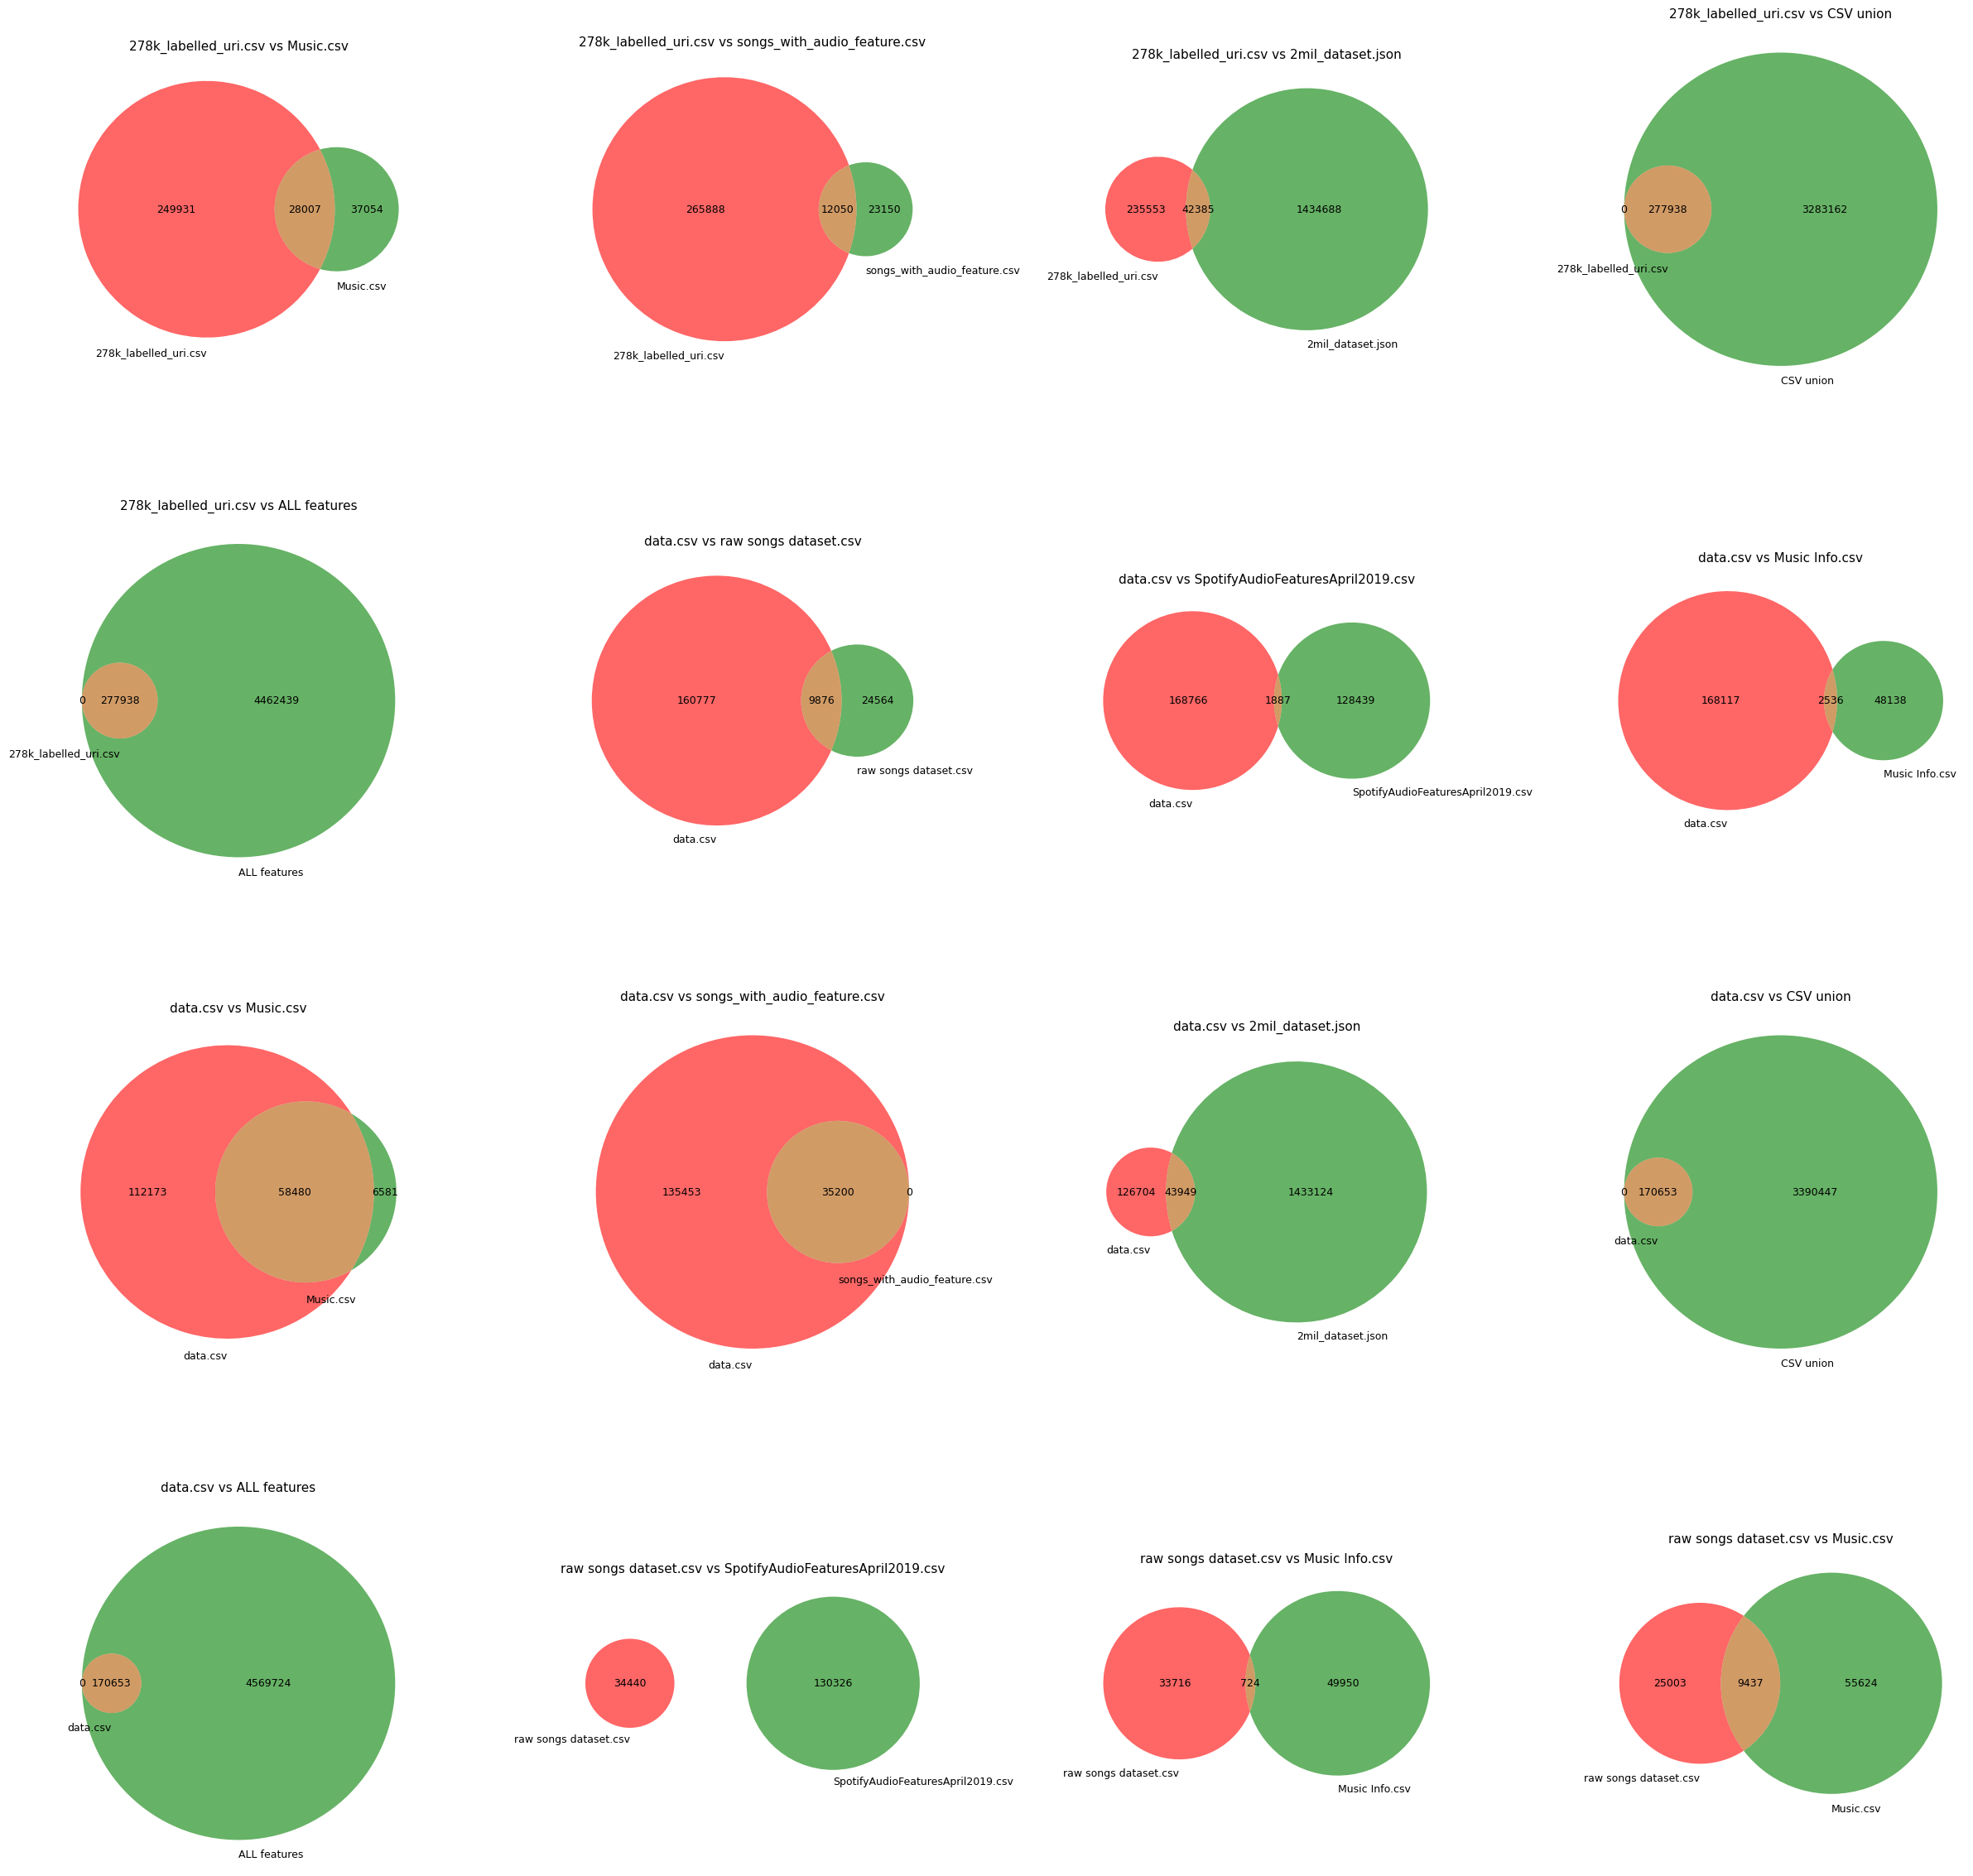

Page 6: plotting 16 diagrams


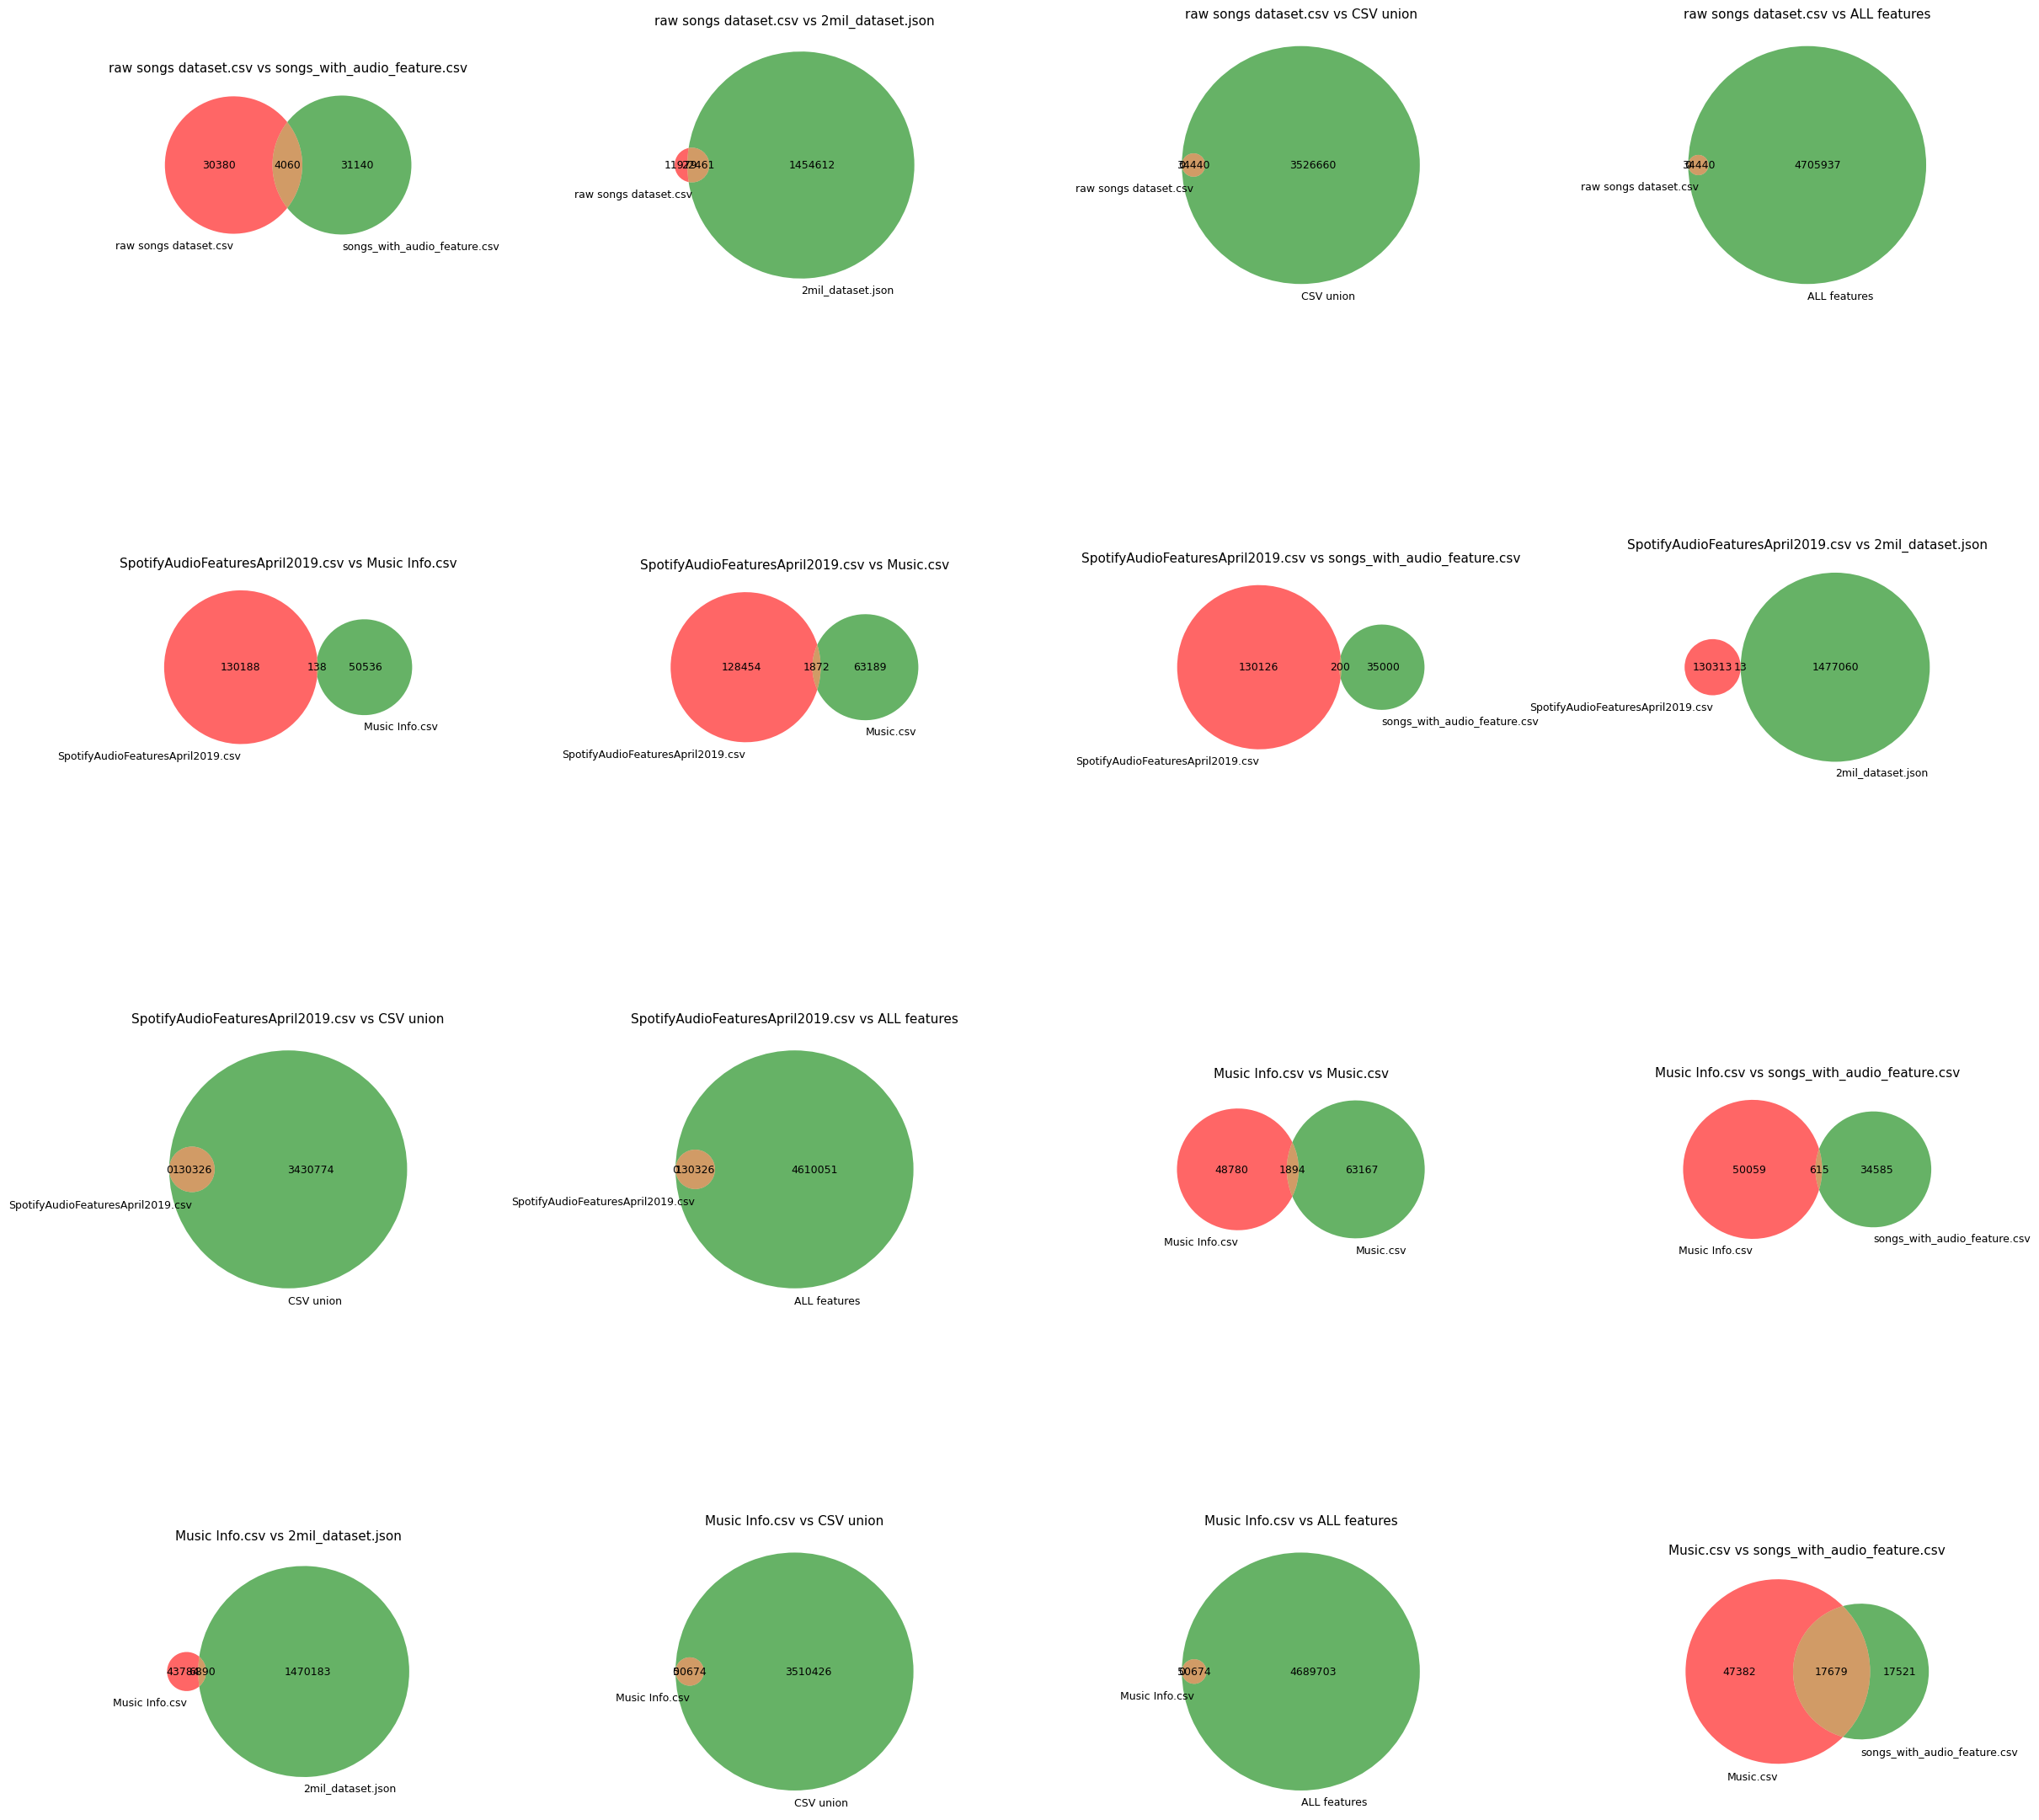

Page 7: plotting 9 diagrams


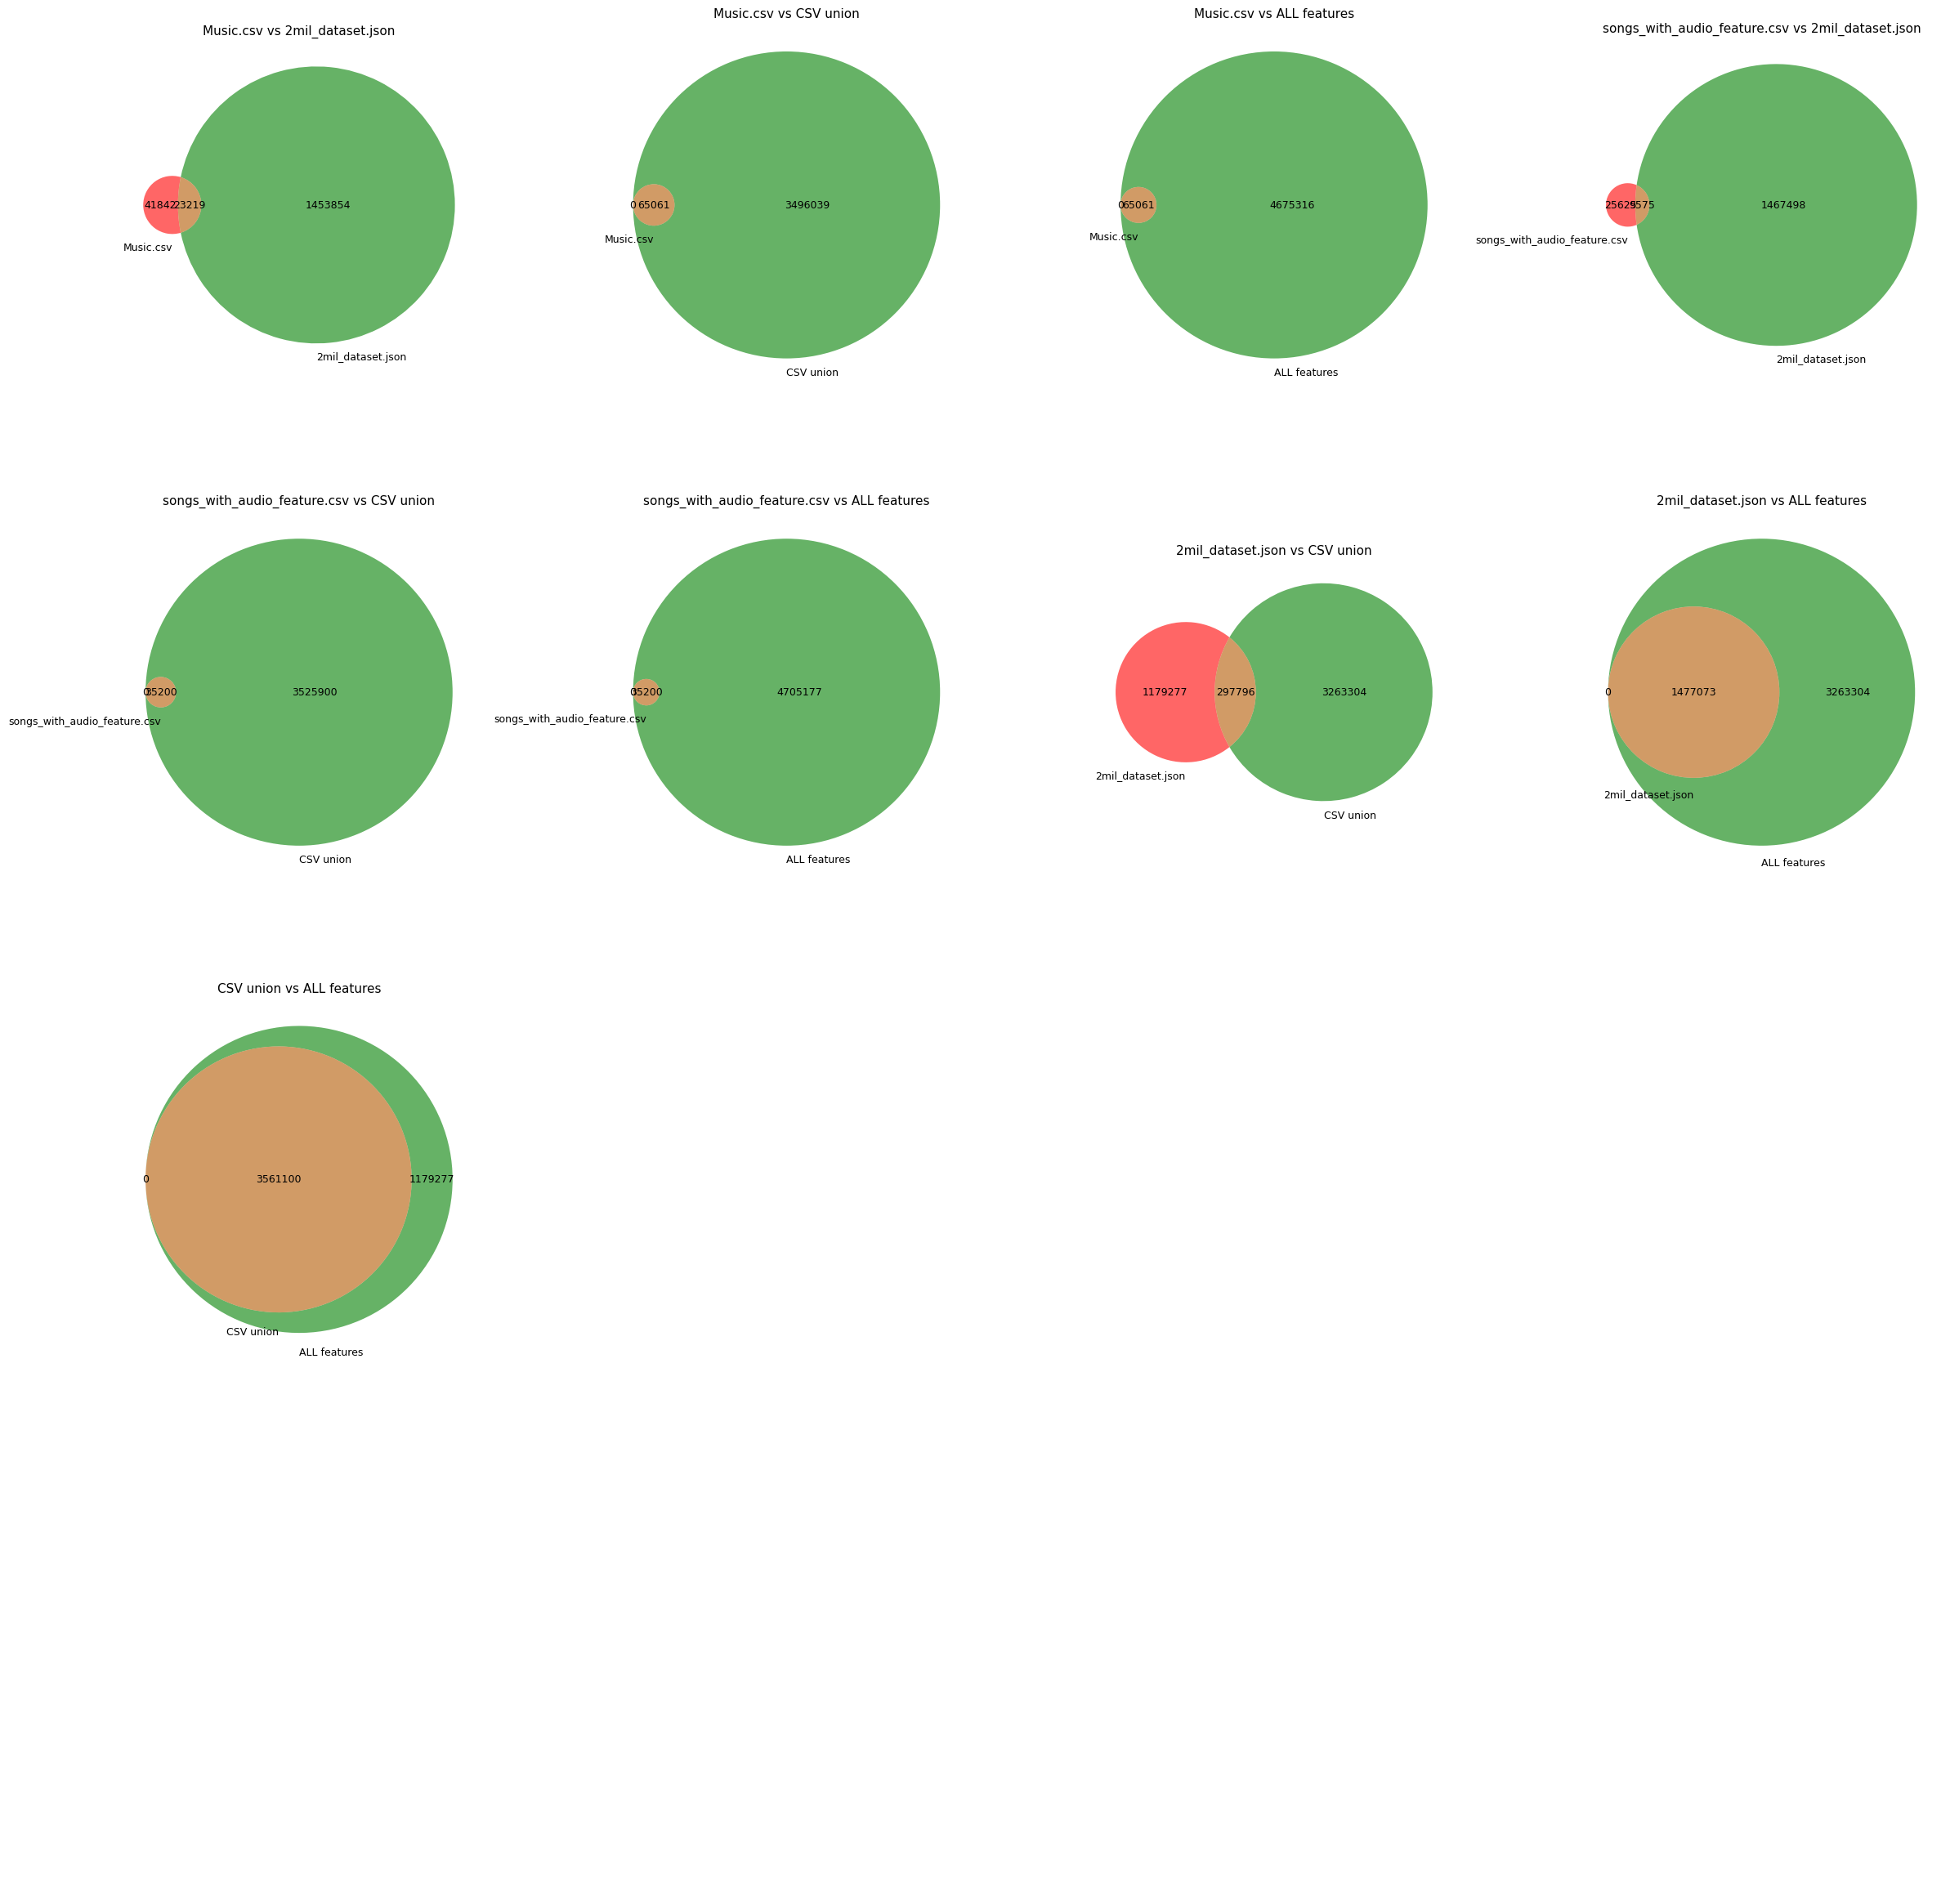

In [40]:
from matplotlib_venn import venn2
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# 🔧 USER-ADJUSTABLE SETTINGS
# ==============================

FIG_COLS = 4            # diagrams per row
FIG_ROWS = 4            # diagrams per column
FIG_WIDTH_PER_COL = 6   # inches per column
FIG_HEIGHT_PER_ROW = 6  # inches per row

LABEL_FONTSIZE  = 9    # font for set names
REGION_FONTSIZE = 9    # font for region numbers
TITLE_FONTSIZE  = 11    # font for subplot titles


# ==============================
# DATA SOURCE DEFINITIONS
# ==============================

sets_info = [
    ("MPD",                     "mpd_track_ids"),
    ("tracks_features.csv",     "ids_tracks_features"),
    ("spotify_data.csv",        "ids_spotify_data"),
    ("spotify_2023.csv",        "ids_spotify_2023"),
    ("tracks.csv",              "ids_tracks"),
    ("278k_labelled_uri.csv",   "ids_278k"),
    ("data.csv",                "ids_data"),
    ("raw songs dataset.csv",   "ids_raw_songs"),
    ("SpotifyAudioFeaturesApril2019.csv", "ids_april_2019"),
    ("Music Info.csv",          "ids_music_info"),
    ("Music.csv",               "ids_music"),
    ("songs_with_audio_feature.csv", "ids_songs_audio"),
    ("2mil_dataset.json",       "ids_2mil"),
    ("CSV union",               "ids_csv_union"),
    ("ALL features",            "ids_features_union"),
]

pairs = list(combinations(sets_info, 2))
print(f"Total pairwise Venn diagrams: {len(pairs)}")

PAIRS_PER_FIG = FIG_COLS * FIG_ROWS

# ==============================
# PLOTTING IN PAGES
# ==============================

for page_start in range(0, len(pairs), PAIRS_PER_FIG):
    page_pairs = pairs[page_start:page_start + PAIRS_PER_FIG]
    page_index = page_start // PAIRS_PER_FIG + 1

    fig, axes = plt.subplots(
        FIG_ROWS,
        FIG_COLS,
        figsize=(FIG_COLS * FIG_WIDTH_PER_COL, FIG_ROWS * FIG_HEIGHT_PER_ROW),
    )

    # axes may be 2D or 1D depending on rows/cols
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]

    print(f"Page {page_index}: plotting {len(page_pairs)} diagrams")

    for i, ((labelA, varA), (labelB, varB)) in enumerate(page_pairs):
        ax = axes[i]

        if varA not in globals() or varB not in globals():
            ax.text(0.5, 0.5, f"Missing: {varA}/{varB}", ha="center", va="center")
            ax.axis("off")
            continue

        setA = globals()[varA]
        setB = globals()[varB]

        ax.set_xlim(-0.1, 1.1)
        ax.set_ylim(-0.1, 1.1)

        plt.sca(ax)
        v = venn2(
            subsets=(setA, setB),
            set_labels=(labelA, labelB),
            alpha=0.6,
        )

        # Region labels (10, 01, 11)
        for region_id in ["10", "01", "11"]:
            label = v.get_label_by_id(region_id)
            if label is not None:
                label.set_fontsize(REGION_FONTSIZE)

        # Set labels (A, B)
        if v.get_label_by_id("A") is not None:
            v.get_label_by_id("A").set_fontsize(LABEL_FONTSIZE)
        if v.get_label_by_id("B") is not None:
            v.get_label_by_id("B").set_fontsize(LABEL_FONTSIZE)

        ax.set_title(f"{labelA} vs {labelB}", fontsize=TITLE_FONTSIZE)

    # Turn off any unused axes on this page
    for j in range(len(page_pairs), len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


In [41]:
from pathlib import Path
import os
import pandas as pd
from itertools import combinations

# --------- config paths ---------
PROJECT_ROOT = Path("..").resolve()
DATA_DIR = PROJECT_ROOT / "data"
RAW_DIR = DATA_DIR / "raw"

print("PROJECT_ROOT:", PROJECT_ROOT)
print("DATA_DIR    :", DATA_DIR)
print("RAW_DIR     :", RAW_DIR)

# Candidate dataset files and their *preferred* ID column names
candidate_files = {
    "liked_songs_flat": {
        "paths": [DATA_DIR / "liked_songs_flat.csv"],
        "id_candidates": ["track_id"],
    },
    "tracks_features_main": {
        "paths": [DATA_DIR / "tracks_features.csv"],
        "id_candidates": ["id", "track_id"],
    },
    "tracks_features_raw": {
        "paths": [RAW_DIR / "tracks_features.csv"],
        "id_candidates": ["id", "track_id"],
    },
    "kaggle_dataset_root": {
        "paths": [PROJECT_ROOT / "dataset.csv"],
        "id_candidates": ["track_id", "id"],
    },
    "kaggle_dataset_data": {
        "paths": [DATA_DIR / "dataset.csv"],
        "id_candidates": ["track_id", "id"],
    },
}

datasets = {}  # name -> dict(info)

# --------- helper to choose ID column ---------
def choose_id_col(df: pd.DataFrame, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    # fall back to some plausible Spotify id-ish column
    for c in df.columns:
        if "id" in c.lower():
            return c
    return None

# --------- load datasets ---------
print("\n=== Loading datasets ===")
for name, cfg in candidate_files.items():
    path_used = None
    for p in cfg["paths"]:
        if p.exists():
            path_used = p
            break
    if not path_used:
        print(f"- {name}: none of {cfg['paths']} found → SKIPPING")
        continue

    try:
        df = pd.read_csv(path_used)
    except Exception as e:
        print(f"- {name}: FAILED to read {path_used} → {e}")
        continue

    id_col = choose_id_col(df, cfg["id_candidates"])
    datasets[name] = {
        "name": name,
        "path": path_used,
        "df": df,
        "id_col": id_col,
    }

    print(f"\n--- {name} ---")
    print("  path      :", path_used)
    print("  shape     :", df.shape)
    print("  id_col    :", id_col)
    print("  columns   :", list(df.columns))

if not datasets:
    raise RuntimeError("No datasets loaded; check paths above.")

# --------- summarise ID coverage ---------
print("\n\n=== ID coverage per dataset ===")
for name, info in datasets.items():
    df = info["df"]
    id_col = info["id_col"]
    if id_col is None:
        print(f"- {name}: NO id-like column detected.")
        continue

    ids = (
        df[id_col]
        .dropna()
        .astype(str)
        .str.strip()
    )
    unique_ids = set(ids.unique())
    info["id_set"] = unique_ids
    print(f"- {name}: {len(df):,} rows | {len(unique_ids):,} unique IDs (col='{id_col}')")

# --------- pairwise overlaps ---------
print("\n\n=== Pairwise track-ID overlaps ===")
pair_results = []

for (name_a, info_a), (name_b, info_b) in combinations(datasets.items(), 2):
    id_col_a = info_a.get("id_col")
    id_col_b = info_b.get("id_col")
    if id_col_a is None or id_col_b is None:
        continue

    set_a = info_a.get("id_set")
    set_b = info_b.get("id_set")
    if set_a is None or set_b is None:
        continue

    inter = set_a & set_b
    only_a = set_a - set_b
    only_b = set_b - set_a

    n_a = len(set_a)
    n_b = len(set_b)
    n_i = len(inter)

    cov_a = n_i / n_a * 100 if n_a else 0.0
    cov_b = n_i / n_b * 100 if n_b else 0.0

    result = {
        "pair": f"{name_a} ↔ {name_b}",
        "n_A": n_a,
        "n_B": n_b,
        "n_overlap": n_i,
        "overlap_%_of_A": cov_a,
        "overlap_%_of_B": cov_b,
        "only_A": len(only_a),
        "only_B": len(only_b),
    }
    pair_results.append(result)

    print(
        f"- {name_a} ↔ {name_b}: "
        f"overlap={n_i:,} | "
        f"{cov_a:.1f}% of {name_a}, {cov_b:.1f}% of {name_b} "
        f"| only_{name_a}={len(only_a):,}, only_{name_b}={len(only_b):,}"
    )

# --------- column-subset checks (redundancy hints) ---------
print("\n\n=== Column subset & potential redundancy checks ===")
for (name_a, info_a), (name_b, info_b) in combinations(datasets.items(), 2):
    cols_a = set(info_a["df"].columns)
    cols_b = set(info_b["df"].columns)
    id_col_a = info_a["id_col"]
    id_col_b = info_b["id_col"]

    # Only consider if we've ID sets for both
    set_a = info_a.get("id_set")
    set_b = info_b.get("id_set")
    if set_a is None or set_b is None:
        continue

    # same-type ID columns?
    same_key_type = (id_col_a is not None and id_col_b is not None)

    # is A's ID set subset of B's?
    a_in_b = set_a.issubset(set_b)
    b_in_a = set_b.issubset(set_a)

    # column subset relations
    a_cols_in_b = cols_a.issubset(cols_b)
    b_cols_in_a = cols_b.issubset(cols_a)

    msg_parts = []

    if a_in_b and a_cols_in_b and same_key_type:
        msg_parts.append(f"'{name_a}' appears FULLY SUBSUMED by '{name_b}' (IDs and columns).")
    elif a_in_b and same_key_type:
        msg_parts.append(f"'{name_a}' IDs are a subset of '{name_b}' IDs.")
    if b_in_a and b_cols_in_a and same_key_type:
        msg_parts.append(f"'{name_b}' appears FULLY SUBSUMED by '{name_a}' (IDs and columns).")
    elif b_in_a and same_key_type:
        msg_parts.append(f"'{name_b}' IDs are a subset of '{name_a}' IDs.")

    if msg_parts:
        print(f"- {name_a} vs {name_b}:")
        for m in msg_parts:
            print("   •", m)

print("\n\n>>> DONE. Copy everything from '=== Loading datasets ===' downwards and paste it to ChatGPT for analysis.")


PROJECT_ROOT: C:\Users\Kiera\Music_Recommender
DATA_DIR    : C:\Users\Kiera\Music_Recommender\data
RAW_DIR     : C:\Users\Kiera\Music_Recommender\data\raw

=== Loading datasets ===
- liked_songs_flat: none of [WindowsPath('C:/Users/Kiera/Music_Recommender/data/liked_songs_flat.csv')] found → SKIPPING
- tracks_features_main: none of [WindowsPath('C:/Users/Kiera/Music_Recommender/data/tracks_features.csv')] found → SKIPPING

--- tracks_features_raw ---
  path      : C:\Users\Kiera\Music_Recommender\data\raw\tracks_features.csv
  shape     : (1204025, 24)
  id_col    : id
  columns   : ['id', 'name', 'album', 'album_id', 'artists', 'artist_ids', 'track_number', 'disc_number', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'year', 'release_date']
- kaggle_dataset_root: none of [WindowsPath('C:/Users/Kiera/Music_Recommender/dataset.csv')] found → SKIPPING
- k